IMDB Movie Recommendations Based on Users' and Critics' Reviews


Question 1: IMDB wants to identify similar movies based on movie's characteristics. Need to do clustering with K-means and 'Minibatch'. Join the ratings with the 'movies': Use pd.merge

 Data set: Kaggle ~ https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer

import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize

In [2]:
pd.__version__


'0.25.1'

In [3]:
movies = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb movies.csv')
names = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb names.csv')
ratings = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb ratings.csv')
# Not useful: title_principals = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb title_principals.csv')

## Combine Data Sets

In [4]:
#IMDB_df = pd.concat([movies, names, ratings], axis=0)
IMDB_df = pd.concat([movies, names, ratings], axis=0, sort = False)
IMDB_df.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
81268,tt9903716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0
81272,tt9914286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.0,1.7,5.0,6.2,5.0


## Exploratory Data Analysis
### Univariate Analysis:
Our data set has 81,273 records/datapoints before dropping columns with missing values. We have 70 variables.  
Which variables are continuous and which are categorical?
We have missing data in the 'language','reviews_from_critics' columns. 
If so, how much?

In [5]:
movie_recs = pd.merge(movies, ratings, on='imdb_title_id')
movie_recs

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [6]:
movie_recs.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes'

### Outliers
Look for outliers using boxplot and histogram.

In [7]:
movie_recs.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,81273.000000,81273.000000,81273.000000,8.127300e+04,12722.000000,74196.000000,70286.000000,81273.000000,8.127300e+04,81273.000000,...,80409.000000,80409.000000,78701.000000,78701.000000,80667.000000,80667.000000,81034.000000,81034.000000,81269.000000,81269.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,55.762695,43.753194,27.992758,5.926587,9.421771e+03,6.259578,...,6.103064,635.330672,6.064022,184.702024,5.139347,77.299974,5.967583,1676.121468,5.775737,4371.879487
std,23.992284,25.320189,1.243315,5.220245e+04,17.757453,159.903568,58.708764,1.243315,5.220245e+04,1.161615,...,1.452682,3350.118823,1.542429,771.842552,1.315429,127.173472,1.322301,8450.086745,1.295955,23093.245801
min,1906.000000,40.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,1.000000,9.900000e+01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,43.000000,4.000000,3.000000,5.200000,2.060000e+02,5.600000,...,5.300000,10.000000,5.300000,6.000000,4.300000,12.000000,5.200000,24.000000,5.100000,97.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,56.000000,9.000000,8.000000,6.100000,4.950000e+02,6.400000,...,6.300000,27.000000,6.300000,16.000000,5.300000,28.000000,6.200000,84.500000,6.000000,233.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,69.000000,26.000000,24.000000,6.800000,1.865000e+03,7.100000,...,7.000000,111.000000,7.000000,63.000000,6.000000,77.000000,6.900000,362.000000,6.700000,895.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000,10.000000,2.159628e+06,10.000000,...,10.000000,114034.000000,10.000000,30244.000000,10.000000,936.000000,10.000000,341457.000000,10.000000,862970.000000


In [8]:
movie_recs['reviews_from_critics'].dtype

dtype('float64')

In [9]:
#Without all variables but the 'review from critics'
new_df = movie_recs['reviews_from_critics'].dropna()


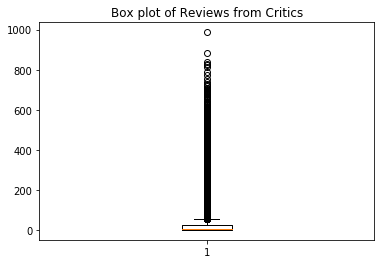

In [10]:
#Look for outliers
plt.boxplot(new_df)
plt.title("Box plot of Reviews from Critics")
plt.show()

In [11]:
movie_recs["reviews_from_critics"]

0         7.0
1         2.0
2         3.0
3        14.0
4         5.0
         ... 
81268     NaN
81269     NaN
81270     NaN
81271     NaN
81272     NaN
Name: reviews_from_critics, Length: 81273, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


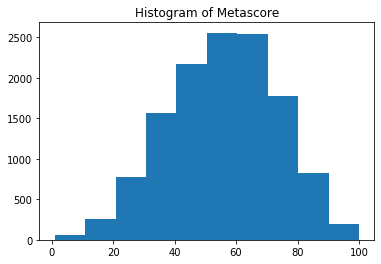

In [12]:
plt.hist(movie_recs["metascore"])
plt.title("Histogram of Metascore")
plt.show()

from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_views = winsorize(youtube_df["Video views"], (0, 0.10))

winsorized_views

### Visualizing Categorical Variables
Possible, but unnecessary in creating a wordcloud.

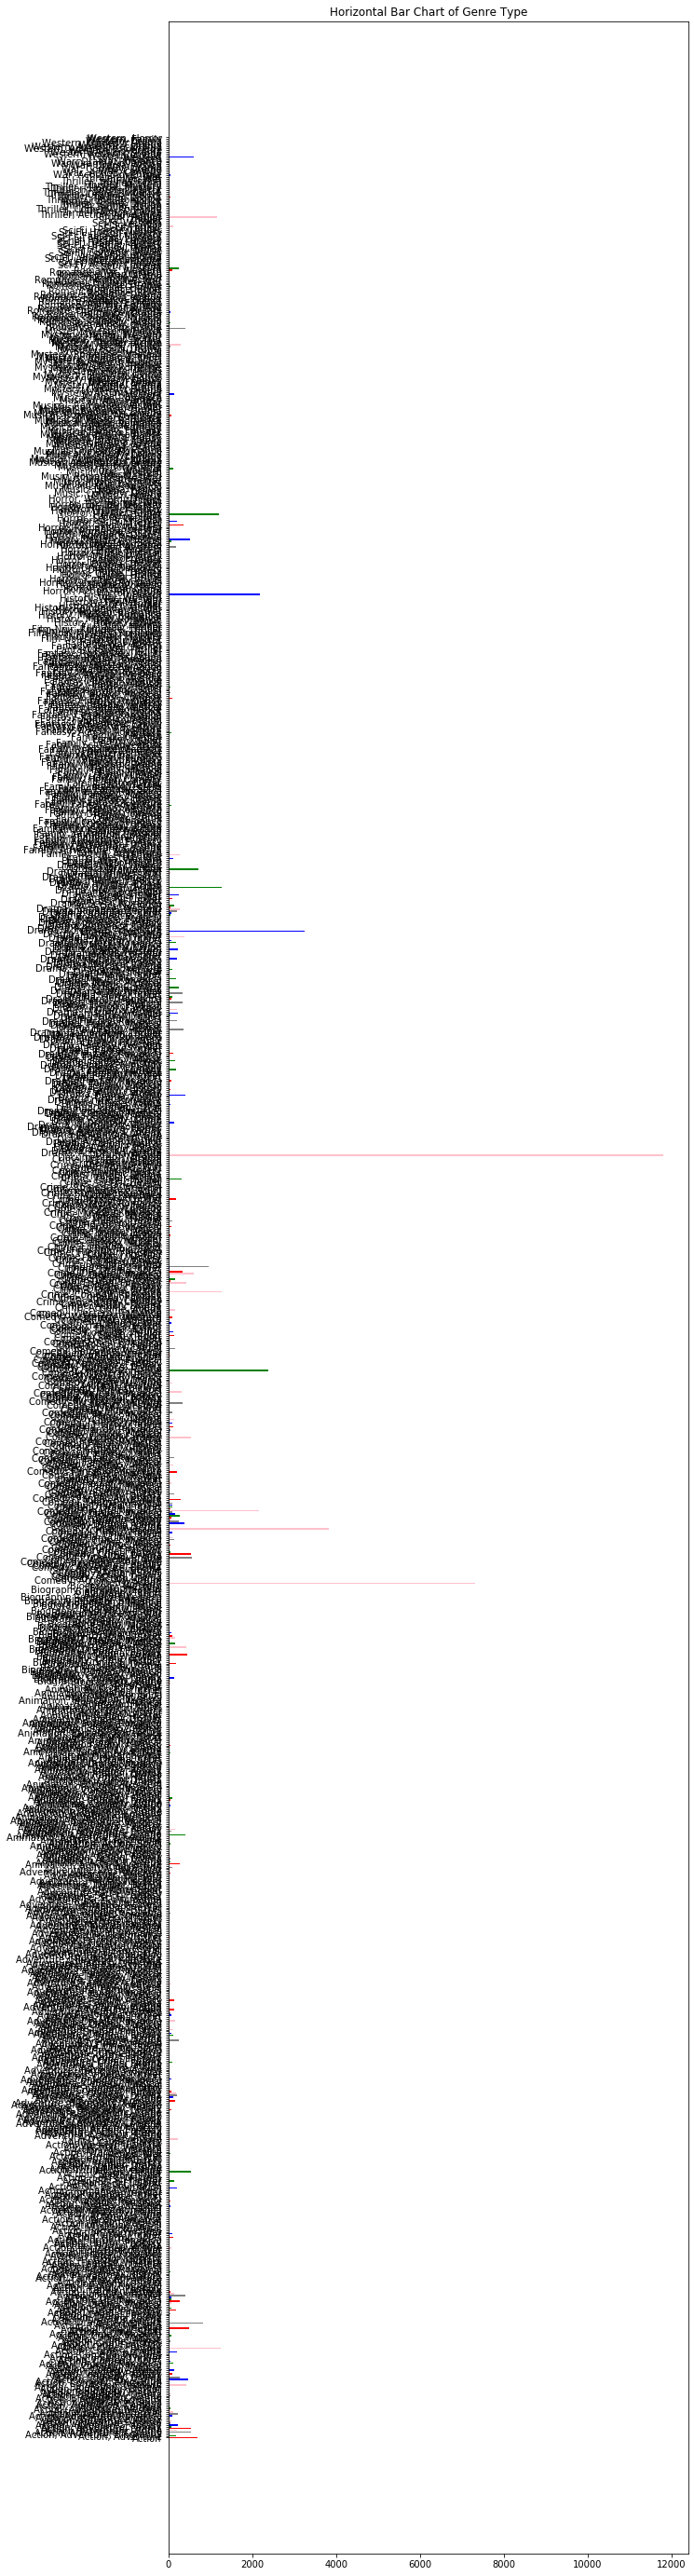

In [14]:
# bar chart of categorical variable 'genre'
plt.figure(figsize=(10,50))
plt.barh(movie_recs.groupby("genre")["genre"].count().index, 
        movie_recs.groupby("genre")["genre"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Horizontal Bar Chart of Genre Type")

plt.show()

In [15]:
#check Genre
#movie_recs.groupby('genre')['genre'].count().sort_values(ascending=False)
movie_recs['genre'].iloc[200]
movie_recs['genre'].iloc[1200]

'Drama, Sport'

In [16]:
movie_recs['genre'].apply(lambda row: row.split(','))

0          [Biography,  Crime,  Drama]
1                              [Drama]
2                    [Drama,  History]
3        [Adventure,  Drama,  Fantasy]
4                  [Biography,  Drama]
                     ...              
81268              [Horror,  Thriller]
81269                          [Drama]
81270                          [Drama]
81271                          [Drama]
81272                 [Drama,  Family]
Name: genre, Length: 81273, dtype: object

In [17]:
movie_recs['genre'].str.split(',')

0          [Biography,  Crime,  Drama]
1                              [Drama]
2                    [Drama,  History]
3        [Adventure,  Drama,  Fantasy]
4                  [Biography,  Drama]
                     ...              
81268              [Horror,  Thriller]
81269                          [Drama]
81270                          [Drama]
81271                          [Drama]
81272                 [Drama,  Family]
Name: genre, Length: 81273, dtype: object

In [18]:
#Create a new column w/new genre list encoded as a list
movie_recs['genre_as_list'] = movie_recs['genre'].str.split(', ')

In [19]:
#addresses list through Counter.
#Counter is a dictionary
#https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter
counter = Counter()
movie_recs['genre_as_list'].apply(lambda row: counter.update(row))

0        None
1        None
2        None
3        None
4        None
         ... 
81268    None
81269    None
81270    None
81271    None
81272    None
Name: genre_as_list, Length: 81273, dtype: object

In [ ]:
counter 

In [ ]:
pd.Series(counter).sort_values(ascending=True).plot(kind='barh')

## Bivariate Analysis

In [20]:
movie_recs.corr()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
year,1.000000,0.150164,-0.213843,0.061409,-0.176244,0.068079,0.145183,-0.213843,0.061409,-0.161050,...,-0.195557,0.069781,-1.301187e-01,0.035010,-0.278414,-0.083210,-0.227915,0.038136,-0.192852,0.066520
duration,0.150164,1.000000,0.221752,0.111327,0.217760,0.117187,0.132651,0.221752,0.111327,0.230511,...,0.147623,0.102621,1.015518e-01,0.128532,0.035486,0.100393,0.172376,0.103821,0.219612,0.112600
avg_vote,-0.213843,0.221752,1.000000,0.164838,0.692214,0.142879,0.198265,1.000000,0.164838,0.929883,...,0.773037,0.162431,5.882711e-01,0.196566,0.556508,0.240618,0.857756,0.168927,0.955622,0.169411
votes,0.061409,0.111327,0.164838,1.000000,0.196126,0.792243,0.674826,0.164838,1.000000,0.141389,...,0.117391,0.941435,1.202166e-01,0.926327,0.196112,0.665908,0.152963,0.968959,0.169361,0.993696
metascore,-0.176244,0.217760,0.692214,0.196126,1.000000,0.128114,0.239111,0.692214,0.196126,0.643122,...,0.616772,0.183841,5.746806e-01,0.243426,0.641050,0.174390,0.698303,0.206833,0.686476,0.196101
reviews_from_users,0.068079,0.117187,0.142879,0.792243,0.128114,1.000000,0.697933,0.142879,0.792243,0.116919,...,0.098785,0.738127,1.102905e-01,0.750259,0.188844,0.648625,0.137209,0.782715,0.147310,0.780784
reviews_from_critics,0.145183,0.132651,0.198265,0.674826,0.239111,0.697933,1.000000,0.198265,0.674826,0.154266,...,0.133955,0.661528,1.455135e-01,0.659651,0.242820,0.761861,0.190593,0.647043,0.209576,0.690770
weighted_average_vote,-0.213843,0.221752,1.000000,0.164838,0.692214,0.142879,0.198265,1.000000,0.164838,0.929883,...,0.773037,0.162431,5.882711e-01,0.196566,0.556508,0.240618,0.857756,0.168927,0.955622,0.169411
total_votes,0.061409,0.111327,0.164838,1.000000,0.196126,0.792243,0.674826,0.164838,1.000000,0.141389,...,0.117391,0.941435,1.202166e-01,0.926327,0.196112,0.665908,0.152963,0.968959,0.169361,0.993696
mean_vote,-0.161050,0.230511,0.929883,0.141389,0.643122,0.116919,0.154266,0.929883,0.141389,1.000000,...,0.750975,0.140215,5.458187e-01,0.169356,0.451340,0.178454,0.811108,0.143644,0.850408,0.144188


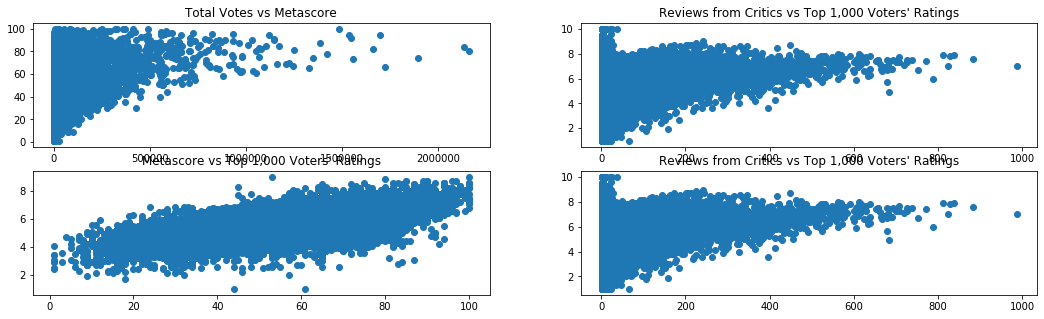

In [21]:
#Bivariate Analysis of 2 continuous variables: total_votes, metascore, top1000_voters_rating',"reviews_from_critics"
for i in range(0, len(movie_recs.total_votes)):
    if pd.isnull(movie_recs.total_votes[i]):
        movie_recs.total_votes[i] = movie_recs.total_votes[i-1]
        
plt.figure(figsize=(18,5))

plt.subplot(2,2,1)
plt.scatter(movie_recs["total_votes"], movie_recs["metascore"])
plt.title("Total Votes vs Metascore")

plt.subplot(2,2,2)
plt.scatter(movie_recs["reviews_from_critics"], movie_recs["top1000_voters_rating"])
plt.title("Reviews from Critics vs Top 1,000 Voters' Ratings")

plt.subplot(2,2,3)
plt.scatter(movie_recs["metascore"], movie_recs["top1000_voters_rating"])
plt.title("Metascore vs Top 1,000 Voters' Ratings")

plt.subplot(2,2,4)
plt.scatter(movie_recs["reviews_from_critics"], movie_recs["top1000_voters_rating"])
plt.title("Reviews from Critics vs Top 1,000 Voters' Ratings")
plt.show()

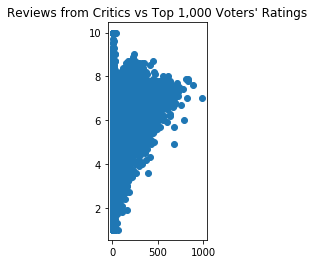

In [22]:
plt.subplot(1,3,1)
plt.scatter(movie_recs["reviews_from_critics"], movie_recs["top1000_voters_rating"])
plt.title("Reviews from Critics vs Top 1,000 Voters' Ratings")
plt.show()

### Bivariate Analysis: Categorical vs. Continuous

In [ ]:
# Plot counts for each combination of genres.
sns.countplot(y="females_allages_avg_vote", hue="genre_as_list", data=movie_recs, palette="Greens_d")
plt.show()

In [37]:
movie_recs['genre_as_list'] #Need to convert every element to string values to read

0          [Biography, Crime, Drama]
1                            [Drama]
2                   [Drama, History]
3        [Adventure, Drama, Fantasy]
4                 [Biography, Drama]
                    ...             
81268             [Horror, Thriller]
81269                        [Drama]
81270                        [Drama]
81271                        [Drama]
81272                [Drama, Family]
Name: genre_as_list, Length: 81273, dtype: object

In [38]:
#L = ['L','O','L']
#makeitastring = ''.join(map(str, L))
Reza Roshani Tabrizi11:30 AM
['.'.join(item) for item in mylist]

movie_recs['females_allages_avg_vote'].iloc[','.join(list)
makeitastring = ''.join(movie_recs(str, 'genre_as_list'))
                                            
 #Sample code                                           Reza Roshani Tabrizi11:23 AM
a = ['friend', 'brother', 'mother'] 
                                            '.'.join
                                            (a) 'friend.brother.mother'
                                            

TypeError: 'DataFrame' object is not callable

In [39]:
genre_string = "".join('genre_as_list')
print(genre_string)

genre_as_list


In [40]:
type(genre_string)

str

In [ ]:
sns.countplot(y="females_allages_avg_vote", hue="genre_as_list", data=movie_recs, palette="Greens_d")
plt.show()

In [31]:
movie_recs."females_allages_avg_vote".head()

SyntaxError: invalid syntax (<ipython-input-31-ba427d68104a>, line 1)

In [35]:
movie_recs['females_allages_avg_vote']

0        6.1
1        5.7
2        5.8
3        7.2
4        5.4
        ... 
81268    5.8
81269    NaN
81270    NaN
81271    NaN
81272    1.0
Name: females_allages_avg_vote, Length: 81273, dtype: float64

In [32]:
movie_recs.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,genre_as_list
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0,"[Biography, Crime, Drama]"
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0,[Drama]
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0,"[Drama, History]"
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0,"[Adventure, Drama, Fantasy]"
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0,"[Biography, Drama]"


### Bivariate Analsysis: Categorical vs. Categorical 

In [25]:
# create crosstab: gender by race/ethnicity
movie_recs = pd.crosstab(movie_recs["genre_as_list"], movie_recs["director"])
movie_recs

TypeError: unhashable type: 'list'

### Continuous vs. Categorical T-test

In [30]:
#Test whether group differences are significant.
genre = movie_recs["genre"].unique()
grouped_df = movie_recs.groupby("genre")
for var in ["females_allages_avg_vote", "reviews_from_critics", "top1000_voters_rating"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(genre)):
        for j in range(i+1, len(genre)):
            print("t-test between groups {0} and {1}:".format(genre[i], genre[j]))
            print(stats.ttest_ind(
                movie_recs[movie_recs["genre"]==genre[i]][var], 
                movie_recs[movie_recs["genre"]==genre[j]][var]
            ))

------------------------------------------------
Comparisons for variable: females_allages_avg_vote
------------------------------------------------
t-test between groups Biography, Crime, Drama and Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Drama, History:
Ttest_indResult(statistic=0.8203141561706072, pvalue=0.4123956668749651)
t-test between groups Biography, Crime, Drama and Adventure, Drama, Fantasy:
Ttest_indResult(statistic=3.1555499991741898, pvalue=0.0017904612801548881)
t-test between groups Biography, Crime, Drama and Biography, Drama:
Ttest_indResult(statistic=0.6045563896483933, pvalue=0.5456863915149713)
t-test between groups Biography, Crime, Drama and Biography, Drama, Romance:
Ttest_indResult(statistic=0.03046226834999272, pvalue=0.9757161537002174)
t-test between groups Biography, Crime, Drama and History, War:
Ttest_indResult(statistic=5.2700944011121456, pvalue=3.501317518210964e-07)
t-test between groups Biogr

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Adventure, Family, Fantasy:
Ttest_indResult(statistic=5.154005268602448, pvalue=4.428311556319939e-07)
t-test between groups Biography, Crime, Drama and Action, Adventure, Drama:
Ttest_indResult(statistic=8.376969213092075, pvalue=2.729218294719973e-16)
t-test between groups Biography, Crime, Drama and Action, Drama, Romance:
Ttest_indResult(statistic=8.205679061590256, pvalue=2.4214789865932295e-15)
t-test between groups Biography, Crime, Drama and Comedy, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Drama, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Drama, History, War:
Ttest_indResult(statistic=1.394502872153219, pvalue=0.1639264883937301)
t-test between groups Biography, Crime, Drama and Action, Adventure, Crime:
Ttest_indResult(statistic=9.388945171984323, pvalue=5.1369568069470

Ttest_indResult(statistic=8.923838837661597, pvalue=1.3216548124018389e-18)
t-test between groups Biography, Crime, Drama and Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Adventure, Fantasy, Romance:
Ttest_indResult(statistic=2.2991199403641183, pvalue=0.022520689789800843)
t-test between groups Biography, Crime, Drama and Adventure, Fantasy:
Ttest_indResult(statistic=11.256070001975562, pvalue=2.2792611100627343e-24)
t-test between groups Biography, Crime, Drama and Drama, Fantasy, Thriller:
Ttest_indResult(statistic=4.28782465751889, pvalue=2.724789913894614e-05)
t-test between groups Biography, Crime, Drama and Crime, Romance, Thriller:
Ttest_indResult(statistic=5.952150961241214, pvalue=1.0902736876399244e-08)
t-test between groups Biography, Crime, Drama and Drama, Romance, Sport:
Ttest_indResult(statistic=4.454748941684318, pvalue=1.245072185365002e-05)
t-test between groups Biography, Crime, Drama and Drama, Family, Fantas

Ttest_indResult(statistic=2.9547493877811637, pvalue=0.0033849540544615836)
t-test between groups Biography, Crime, Drama and Comedy, Crime, Mystery:
Ttest_indResult(statistic=3.4310416940004203, pvalue=0.0006772053385840249)
t-test between groups Biography, Crime, Drama and Crime, Film-Noir, Thriller:
Ttest_indResult(statistic=-0.3142586951139425, pvalue=0.753633603831589)
t-test between groups Biography, Crime, Drama and Crime, Musical:
Ttest_indResult(statistic=2.7278170546643477, pvalue=0.006970024964586743)
t-test between groups Biography, Crime, Drama and Drama, Musical, Romance:
Ttest_indResult(statistic=3.0376432921784082, pvalue=0.0025451512713412262)
t-test between groups Biography, Crime, Drama and Drama, Mystery, Thriller:
Ttest_indResult(statistic=7.801091405262115, pvalue=2.997116894877247e-14)
t-test between groups Biography, Crime, Drama and Comedy, Musical:
Ttest_indResult(statistic=5.333365668215995, pvalue=1.444919448287506e-07)
t-test between groups Biography, Crime

Ttest_indResult(statistic=2.8806162924393885, pvalue=0.004388778120460607)
t-test between groups Biography, Crime, Drama and Drama, Fantasy, Mystery:
Ttest_indResult(statistic=2.918279130958488, pvalue=0.0038194666538818476)
t-test between groups Biography, Crime, Drama and Comedy, Mystery:
Ttest_indResult(statistic=5.191003224451301, pvalue=4.0710886509469607e-07)
t-test between groups Biography, Crime, Drama and Action, Drama, Sport:
Ttest_indResult(statistic=7.125342219252998, pvalue=1.0446843828240735e-11)
t-test between groups Biography, Crime, Drama and Comedy, Crime, Horror:
Ttest_indResult(statistic=7.137084956227628, pvalue=1.1452538468853952e-11)
t-test between groups Biography, Crime, Drama and Horror, Sci-Fi:
Ttest_indResult(statistic=18.91686800212414, pvalue=1.2350236861488537e-61)
t-test between groups Biography, Crime, Drama and Horror, Mystery, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Action, Crime, Romance:


Ttest_indResult(statistic=0.29300134669303646, pvalue=0.7697612967073673)
t-test between groups Biography, Crime, Drama and Romance, Musical, Drama:
Ttest_indResult(statistic=-0.1156666550487037, pvalue=0.9080395350534909)
t-test between groups Biography, Crime, Drama and Comedy, Music, Musical:
Ttest_indResult(statistic=-1.4620449315549857, pvalue=0.14529060191529175)
t-test between groups Biography, Crime, Drama and Comedy, Crime, Music:
Ttest_indResult(statistic=1.8229756190347033, pvalue=0.06977805405468637)
t-test between groups Biography, Crime, Drama and Comedy, Musical, Sport:
Ttest_indResult(statistic=1.0521004013420416, pvalue=0.2940621901722219)
t-test between groups Biography, Crime, Drama and Action, Adventure, Music:
Ttest_indResult(statistic=4.492831589790961, pvalue=1.1790374507702362e-05)
t-test between groups Biography, Crime, Drama and Action, Romance, Western:
Ttest_indResult(statistic=3.31862178140478, pvalue=0.0010671075771772186)
t-test between groups Biography, 

Ttest_indResult(statistic=-0.18969747576326282, pvalue=0.8497227082533462)
t-test between groups Biography, Crime, Drama and Comedy, Family, Western:
Ttest_indResult(statistic=0.6181495910592238, pvalue=0.5371980401283589)
t-test between groups Biography, Crime, Drama and History, Western:
Ttest_indResult(statistic=2.258408759013904, pvalue=0.025039048895976544)
t-test between groups Biography, Crime, Drama and Adventure, Biography, Romance:
Ttest_indResult(statistic=3.0511828462995934, pvalue=0.0026054404365573975)
t-test between groups Biography, Crime, Drama and Adventure, Crime, Mystery:
Ttest_indResult(statistic=2.0966653195700236, pvalue=0.037306237355528904)
t-test between groups Biography, Crime, Drama and War, Drama:
Ttest_indResult(statistic=3.3943426144605637, pvalue=0.0008147275664099649)
t-test between groups Biography, Crime, Drama and Musical, Romance, Western:
Ttest_indResult(statistic=-0.2014188349632237, pvalue=0.8405877006790843)
t-test between groups Biography, Crim

Ttest_indResult(statistic=2.022788254945285, pvalue=0.04450404283783869)
t-test between groups Biography, Crime, Drama and Adventure, Comedy, Musical:
Ttest_indResult(statistic=-1.292048295553539, pvalue=0.19782396485336598)
t-test between groups Biography, Crime, Drama and Musical, War, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Horror, Comedy:
Ttest_indResult(statistic=7.274295200857788, pvalue=7.941571254343995e-12)
t-test between groups Biography, Crime, Drama and Comedy, Fantasy, Mystery:
Ttest_indResult(statistic=2.2745812759351005, pvalue=0.024042385077857772)
t-test between groups Biography, Crime, Drama and Drama, Film-Noir, Thriller:
Ttest_indResult(statistic=-1.5292539909397393, pvalue=0.12766460940780872)
t-test between groups Biography, Crime, Drama and Action, Crime, Musical:
Ttest_indResult(statistic=-0.5398990063832498, pvalue=0.5899022409355319)
t-test between groups Biography, Crime, Drama and Fantasy, Horror,

Ttest_indResult(statistic=0.22619384022231245, pvalue=0.8212950939161314)
t-test between groups Biography, Crime, Drama and Drama, Thriller, Mystery:
Ttest_indResult(statistic=1.3760607851789322, pvalue=0.17042256887765195)
t-test between groups Biography, Crime, Drama and Animation, Family, Music:
Ttest_indResult(statistic=0.39747614712127927, pvalue=0.6914649094810171)
t-test between groups Biography, Crime, Drama and Drama, Film-Noir, Music:
Ttest_indResult(statistic=0.7428827973387206, pvalue=0.4584653526188033)
t-test between groups Biography, Crime, Drama and Adventure, Comedy, History:
Ttest_indResult(statistic=2.261430529645845, pvalue=0.02478739603017363)
t-test between groups Biography, Crime, Drama and Drama, Family, Music:
Ttest_indResult(statistic=2.7234883139250825, pvalue=0.007025270591352796)
t-test between groups Biography, Crime, Drama and Drama, Family, Western:
Ttest_indResult(statistic=1.766355696234486, pvalue=0.07886169531684521)
t-test between groups Biography, 

Ttest_indResult(statistic=14.019499335174245, pvalue=7.461380041948123e-35)
t-test between groups Biography, Crime, Drama and Animation, Adventure, Family:
Ttest_indResult(statistic=2.3126970942708023, pvalue=0.021310568855286906)
t-test between groups Biography, Crime, Drama and Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Action, Comedy, Sport:
Ttest_indResult(statistic=5.9449774394608035, pvalue=1.2217350206382359e-08)
t-test between groups Biography, Crime, Drama and Adventure, Crime, Thriller:
Ttest_indResult(statistic=4.92651716338642, pvalue=1.7570499628685476e-06)
t-test between groups Biography, Crime, Drama and Crime, Thriller, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Family:
Ttest_indResult(statistic=9.64054338591467, pvalue=3.551203614234943e-20)
t-test between groups Biography, Crime, Drama and Drama, Musical, Western:
Ttest_indResult(statistic=nan, pv

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Mystery, Thriller, Horror:
Ttest_indResult(statistic=2.3906120079788877, pvalue=0.01778191280062982)
t-test between groups Biography, Crime, Drama and Drama, Musical, Family:
Ttest_indResult(statistic=-1.3973926656428166, pvalue=0.16392514535483582)
t-test between groups Biography, Crime, Drama and Action, Romance, War:
Ttest_indResult(statistic=-0.12550354840016523, pvalue=0.9002562309658783)
t-test between groups Biography, Crime, Drama and Adventure, Family, History:
Ttest_indResult(statistic=0.06753379443821211, pvalue=0.9462277735093958)
t-test between groups Biography, Crime, Drama and Fantasy, Musical, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Family, Crime:
Ttest_indResult(statistic=0.8248801012197641, pvalue=0.4104795347892545)
t-test between groups Biography, Crime, Drama and Fantasy, Horror, Romance:
Ttest_indResult(statisti

Ttest_indResult(statistic=3.1688017728856024, pvalue=0.001781370480130375)
t-test between groups Biography, Crime, Drama and Comedy, Musical, Sci-Fi:
Ttest_indResult(statistic=2.320505394823753, pvalue=0.021332083773791116)
t-test between groups Biography, Crime, Drama and Western, Adventure:
Ttest_indResult(statistic=2.939848298955949, pvalue=0.003676364569669234)
t-test between groups Biography, Crime, Drama and Horror, Crime, Drama:
Ttest_indResult(statistic=-0.030302276404564104, pvalue=0.9758579555676694)
t-test between groups Biography, Crime, Drama and Animation, Adventure, Biography:
Ttest_indResult(statistic=0.9053581573321444, pvalue=0.36642229206513044)
t-test between groups Biography, Crime, Drama and Fantasy, Action, Adventure:
Ttest_indResult(statistic=3.7453229827150043, pvalue=0.0002380952376314588)
t-test between groups Biography, Crime, Drama and Horror, Romance:
Ttest_indResult(statistic=8.73902008442155, pvalue=8.258521152830974e-16)
t-test between groups Biography,

Ttest_indResult(statistic=2.775154914046655, pvalue=0.006060186096736838)
t-test between groups Biography, Crime, Drama and Horror, Crime:
Ttest_indResult(statistic=1.509037376614323, pvalue=0.13295911309509892)
t-test between groups Biography, Crime, Drama and Adventure, Action, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Western, Action, Drama:
Ttest_indResult(statistic=3.790376976488021, pvalue=0.00020217874446931165)
t-test between groups Biography, Crime, Drama and Drama, Thriller, Crime:
Ttest_indResult(statistic=3.835259143821823, pvalue=0.0001695178133613462)
t-test between groups Biography, Crime, Drama and Animation, Action, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Horror, Western:
Ttest_indResult(statistic=6.893846733280509, pvalue=7.10197576387023e-11)
t-test between groups Biography, Crime, Drama and Western, Action:
Ttest_indResult(statistic=1.27734612287

Ttest_indResult(statistic=4.026760021553859, pvalue=8.137132350580448e-05)
t-test between groups Biography, Crime, Drama and Crime, Drama, Action:
Ttest_indResult(statistic=5.424600532903593, pvalue=1.700134051655582e-07)
t-test between groups Biography, Crime, Drama and Drama, Mystery, Western:
Ttest_indResult(statistic=0.5650273899145478, pvalue=0.5727251908424027)
t-test between groups Biography, Crime, Drama and Western, Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Family, Drama, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Action, Biography, Comedy:
Ttest_indResult(statistic=2.3255734579072196, pvalue=0.02108039549855001)
t-test between groups Biography, Crime, Drama and Thriller, Drama, Mystery:
Ttest_indResult(statistic=5.294261902828739, pvalue=3.233869121905341e-07)
t-test between groups Biography, Crime, Drama and Comedy, Thriller, Crime:
Ttest_indResult(st

Ttest_indResult(statistic=1.6800766954629638, pvalue=0.09459450400732002)
t-test between groups Biography, Crime, Drama and Animation, Adventure:
Ttest_indResult(statistic=3.5703952423877205, pvalue=0.0004468807182051436)
t-test between groups Biography, Crime, Drama and Crime, Action, Comedy:
Ttest_indResult(statistic=1.1769688896557295, pvalue=0.24068025969687157)
t-test between groups Biography, Crime, Drama and Crime, History, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Horror, Sci-Fi, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Fantasy, Adventure, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Adventure, Family, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Adventure, Crime, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crim

Ttest_indResult(statistic=6.466143966508385, pvalue=8.361390234165818e-10)
t-test between groups Biography, Crime, Drama and Adventure, Fantasy, Western:
Ttest_indResult(statistic=2.450184842705406, pvalue=0.01518860199609452)
t-test between groups Biography, Crime, Drama and Animation, Action, Fantasy:
Ttest_indResult(statistic=1.1996729581409902, pvalue=0.23154514662401438)
t-test between groups Biography, Crime, Drama and Animation, Comedy, Horror:
Ttest_indResult(statistic=1.3696956318921012, pvalue=0.17237341181256854)
t-test between groups Biography, Crime, Drama and Adventure, Thriller, Action:
Ttest_indResult(statistic=5.972165376404845, pvalue=1.1394029185503058e-08)
t-test between groups Biography, Crime, Drama and Crime, Action:
Ttest_indResult(statistic=2.3642339708575224, pvalue=0.01908158352447939)
t-test between groups Biography, Crime, Drama and Animation, Adventure, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Ac

Ttest_indResult(statistic=-0.030198628741594513, pvalue=0.9759405071409215)
t-test between groups Biography, Crime, Drama and Crime, Comedy, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Comedy, Fantasy, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Horror, Thriller, Fantasy:
Ttest_indResult(statistic=0.34621981601237956, pvalue=0.7295606130142718)
t-test between groups Biography, Crime, Drama and Adventure, Family, Animation:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Drama, Family, Thriller:
Ttest_indResult(statistic=0.18040916854987152, pvalue=0.8570177543290523)
t-test between groups Biography, Crime, Drama and Adventure, Sci-Fi, Western:
Ttest_indResult(statistic=5.86194993203857, pvalue=2.004728266787594e-08)
t-test between groups Biography, Crime, Drama and Action, Biography, Western:
Ttest_indResult(statistic=nan, pval

Ttest_indResult(statistic=-2.166656393956664, pvalue=0.03151253598426767)
t-test between groups Biography, Crime, Drama and Musical, Drama, Family:
Ttest_indResult(statistic=2.2232549886069375, pvalue=0.027377188196984776)
t-test between groups Biography, Crime, Drama and Horror, Romance, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Horror, Fantasy, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Mystery, Sci-Fi, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Family, Mystery:
Ttest_indResult(statistic=2.2658485781703273, pvalue=0.024576545395131266)
t-test between groups Biography, Crime, Drama and Crime, Fantasy, Horror:
Ttest_indResult(statistic=5.290641274253251, pvalue=3.259718657324234e-07)
t-test between groups Biography, Crime, Drama and Mystery, Horror, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between

Ttest_indResult(statistic=0.4762897262593875, pvalue=0.6344181216202534)
t-test between groups Biography, Crime, Drama and Musical, Drama, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Action, Animation, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Thriller, Crime, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Sci-Fi, Horror, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Family, Music, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Romance, Drama, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Music, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Animation, Horror, Sci-Fi:
Ttest_indResult(statistic=n

Ttest_indResult(statistic=2.787747115822258, pvalue=0.00584995720418862)
t-test between groups Biography, Crime, Drama and Fantasy, History, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Animation, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Drama, Horror, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Adventure, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Animation, Action, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Animation, Horror:
Ttest_indResult(statistic=-0.3501900174646911, pvalue=0.7265839997763506)
t-test between groups Biography, Crime, Drama and Action, Family, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Drama, Family, Mystery:
Ttest_indR

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Biography, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Comedy, Sport, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Adventure, Crime, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Fantasy, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Crime, Mystery, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Adventure, History, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Crime, Drama and Animation, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Drama, Fantasy:

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Drama, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Fantasy, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Fantasy, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Romance, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Romance, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Family, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Mystery, Thriller:
Ttest_indResult(statist

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Thriller, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Romance, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Western, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Biography, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Drama, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Drama, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Drama, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Drama, Music:
Ttest_indResult(statistic=nan

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Musical, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Drama, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Musical, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Film-Noir, Mystery, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Drama, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, Drama, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Fantasy, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Drama, Adventure:
Ttest_indR

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and History, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Biography, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Crime, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and War, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Musical, Romance, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and History, Music, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Romance, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, History, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Family, Fantasy:
Ttest_indResult(statistic=nan, pv

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Adventure, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Crime, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Crime, Film-Noir:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Horror, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Mystery, Drama, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Horror, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Family, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Horror, Music, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Musical, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Drama, Fantasy:
Ttest_indRe

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Mystery, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Drama, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Family, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Sci-Fi, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Family, Fantasy, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Romance, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Musical, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Horror, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Animation, Adventure, Family:
Ttest_indResult(statisti

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Romance, War, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Horror, Thriller, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Mystery, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Crime, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Horror, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Mystery, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Musical, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, War, Drama:
Ttest_indResult(statistic=na

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Action, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Music, Musical, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Mystery, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, Crime, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and War, Drama, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Thriller, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Biography:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Crime, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Mystery, Horror, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, Drama, Horror:
T

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Thriller, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Thriller, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Mystery, Thriller, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Horror, Thriller, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Drama, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Mystery, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Western, Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Family, Drama, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Biography, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Thriller, Drama, Mystery:
Ttest_i

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Mystery, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Sci-Fi, Fantasy, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Family, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Music, Musical, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Romance, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adult, Drama, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Comedy, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Biography, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, Crime, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Horror, Music

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Animation, Comedy, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Sci-Fi, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Sport, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Biography:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Fantasy, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Action, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Mystery, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Horror, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Fantasy, Horror, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Romance, War:
Ttest_indResult(s

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Thriller, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Fantasy, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Crime, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Fantasy, Musical, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Sci-Fi, Crime, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Musical, Adventure, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Music, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Action, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Fantasy, Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Comedy, Animation:
T

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Horror, Comedy, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Sci-Fi, Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Sci-Fi, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Drama, Thriller, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Sci-Fi, Adventure, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Adventure, Animation, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Musical, Drama, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Animation, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Thriller, Crime, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Sci-Fi, Horro

t-test between groups Drama and Fantasy, Romance, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Animation, Adventure, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Animation, Mystery, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Comedy, Thriller, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Animation, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, History, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Crime, Horror, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Biography, History, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama and Action, Family, Mystery:
Ttest_indResult(statistic=nan, pvalue=

Ttest_indResult(statistic=2.8771666472378796, pvalue=0.00419523248744184)
t-test between groups Drama, History and Fantasy, Drama:
Ttest_indResult(statistic=0.6222222964260362, pvalue=0.5341895906648785)
t-test between groups Drama, History and Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Family, Fantasy, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Family, Fantasy:
Ttest_indResult(statistic=4.81701342841992, pvalue=1.9401807099641195e-06)
t-test between groups Drama, History and Action, Adventure, Drama:
Ttest_indResult(statistic=9.703715971715274, pvalue=3.00609554986596e-21)
t-test between groups Drama, History and Action, Drama, Romance:
Ttest_indResult(statistic=9.182504789935109, pvalu

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Drama, Romance:
Ttest_indResult(statistic=3.989589665578916, pvalue=7.559356429984307e-05)
t-test between groups Drama, History and Adventure, Drama, Western:
Ttest_indResult(statistic=-0.6712632794006248, pvalue=0.5024502011320526)
t-test between groups Drama, History and Drama, Thriller:
Ttest_indResult(statistic=10.705619012257547, pvalue=6.823250825045897e-26)
t-test between groups Drama, History and Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Fantasy, Romance:
Ttest_indResult(statistic=1.6627868400525403, pvalue=0.09719964878001823)
t-test between groups Drama, History and Adventure, Fantasy:
Ttest_indResult(statistic=11.044709578735416, pvalue=3.3747862625466133e-25)
t-test between groups Drama, History and Drama, Fantasy, Thriller:
Ttest_indResult(statistic=3.616489861490797, pvalue=0.0003384713119231834)
t-test between groups

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, Musical:
Ttest_indResult(statistic=2.2916738440752957, pvalue=0.022375491686141148)
t-test between groups Drama, History and Comedy, Crime, Mystery:
Ttest_indResult(statistic=2.877977029500361, pvalue=0.004173261084252348)
t-test between groups Drama, History and Crime, Film-Noir, Thriller:
Ttest_indResult(statistic=-0.6083484125654999, pvalue=0.5433189082168501)
t-test between groups Drama, History and Crime, Musical:
Ttest_indResult(statistic=2.1453852725951656, pvalue=0.032590507703010044)
t-test between groups Drama, History and Drama, Musical, Romance:
Ttest_indResult(statistic=2.681775402995262, pvalue=0.007540111741786455)
t-test between groups Drama, History and Drama, Mystery, Thriller:
Ttest_indResult(statistic=8.33122940523048, pvalue=3.936046857112417e-16)
t-test between groups Drama, History and Comedy, Musical:
Ttest_indResult(statistic=5.169131218214781, pvalue=3.0895864297141225e-

Ttest_indResult(statistic=10.315966530988694, pvalue=3.669805646019512e-22)
t-test between groups Drama, History and Crime, Western, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Action, Adventure, Thriller:
Ttest_indResult(statistic=7.306963187781198, pvalue=1.1479382655430756e-12)
t-test between groups Drama, History and Comedy, Horror, Thriller:
Ttest_indResult(statistic=13.732944334174483, pvalue=4.823484930930452e-36)
t-test between groups Drama, History and Comedy, Drama, Mystery:
Ttest_indResult(statistic=3.135511493212345, pvalue=0.0018256641108226718)
t-test between groups Drama, History and Mystery, Romance, Thriller:
Ttest_indResult(statistic=5.061684892964868, pvalue=6.431216146938751e-07)
t-test between groups Drama, History and Action, Adventure, Mystery:
Ttest_indResult(statistic=1.6034998144118409, pvalue=0.10965515664494875)
t-test between groups Drama, History and Comedy, Music:
Ttest_indResult(statistic=5.142677791671548, 

Ttest_indResult(statistic=3.49590585670405, pvalue=0.0005295033019916117)
t-test between groups Drama, History and Action, Romance, Western:
Ttest_indResult(statistic=2.5783265318098336, pvalue=0.010305620422348484)
t-test between groups Drama, History and Drama, Musical, Comedy:
Ttest_indResult(statistic=-0.6155776493042768, pvalue=0.5385644429380019)
t-test between groups Drama, History and Comedy, Mystery, Romance:
Ttest_indResult(statistic=0.8003786839889766, pvalue=0.42399283773048635)
t-test between groups Drama, History and Mystery, Comedy:
Ttest_indResult(statistic=2.063110240421937, pvalue=0.039818759707200876)
t-test between groups Drama, History and Romance, Comedy, Mystery:
Ttest_indResult(statistic=0.017701202307480932, pvalue=0.9858870823744699)
t-test between groups Drama, History and Drama, History, Western:
Ttest_indResult(statistic=0.5831014150289378, pvalue=0.5601821836414546)
t-test between groups Drama, History and Action, Crime, Western:
Ttest_indResult(statistic=

Ttest_indResult(statistic=2.4018108139316836, pvalue=0.016821681443252263)
t-test between groups Drama, History and Adventure, Crime, Mystery:
Ttest_indResult(statistic=1.5380231808724163, pvalue=0.12490936064696265)
t-test between groups Drama, History and War, Drama:
Ttest_indResult(statistic=2.667838924327661, pvalue=0.007951518158838555)
t-test between groups Drama, History and Musical, Romance, Western:
Ttest_indResult(statistic=-0.263929892980142, pvalue=0.7919858011823828)
t-test between groups Drama, History and Adventure, History:
Ttest_indResult(statistic=2.6456220100189634, pvalue=0.008499042429205626)
t-test between groups Drama, History and History, Music, Romance:
Ttest_indResult(statistic=1.3536819879981254, pvalue=0.17669185485346156)
t-test between groups Drama, History and Romance, Sci-Fi:
Ttest_indResult(statistic=4.1302080625553605, pvalue=4.48158142429494e-05)
t-test between groups Drama, History and Drama, History, Music:
Ttest_indResult(statistic=-0.5815234850002

Ttest_indResult(statistic=-1.6572879884055003, pvalue=0.0982758634860524)
t-test between groups Drama, History and Action, Crime, Musical:
Ttest_indResult(statistic=-0.5442279020477752, pvalue=0.5866234452681047)
t-test between groups Drama, History and Fantasy, Horror, Thriller:
Ttest_indResult(statistic=11.799050859280449, pvalue=6.620809470965734e-28)
t-test between groups Drama, History and Horror, Mystery, Romance:
Ttest_indResult(statistic=4.76961287297075, pvalue=2.6448583287224762e-06)
t-test between groups Drama, History and Musical, Romance, War:
Ttest_indResult(statistic=-0.6863750570049911, pvalue=0.4929209294417717)
t-test between groups Drama, History and Adventure, Comedy, Thriller:
Ttest_indResult(statistic=3.7869061226496896, pvalue=0.00017853125409237778)
t-test between groups Drama, History and Fantasy, Musical, Romance:
Ttest_indResult(statistic=1.5893648555382176, pvalue=0.11284858278477747)
t-test between groups Drama, History and Biography, Comedy, Musical:
Ttest

Ttest_indResult(statistic=2.018803166262252, pvalue=0.04422661772506497)
t-test between groups Drama, History and Drama, Family, Western:
Ttest_indResult(statistic=1.233323159422022, pvalue=0.21824027995336737)
t-test between groups Drama, History and Musical, Family, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, History, Sport:
Ttest_indResult(statistic=1.1093946833537933, pvalue=0.2679824335541327)
t-test between groups Drama, History and Drama, Film-Noir, Sport:
Ttest_indResult(statistic=-0.9141206059599585, pvalue=0.3612585837940637)
t-test between groups Drama, History and Action, Comedy, Western:
Ttest_indResult(statistic=1.4915691005809206, pvalue=0.13666884697433346)
t-test between groups Drama, History and Comedy, Sci-Fi:
Ttest_indResult(statistic=12.144779727762714, pvalue=4.257250238882273e-30)
t-test between groups Drama, History and Mystery, Sci-Fi, Thriller:
Ttest_indResult(statistic=6.350880902782355, pvalue=5.8510764

Ttest_indResult(statistic=4.828366558319924, pvalue=2.0303395378302033e-06)
t-test between groups Drama, History and Fantasy, Music, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Action, Sci-Fi, Thriller:
Ttest_indResult(statistic=15.268694692462631, pvalue=2.1476052328248225e-43)
t-test between groups Drama, History and Comedy, Crime, Fantasy:
Ttest_indResult(statistic=3.424553341819527, pvalue=0.0006840609473384198)
t-test between groups Drama, History and Comedy, Fantasy, Sci-Fi:
Ttest_indResult(statistic=6.434549122478975, pvalue=3.7526537801281033e-10)
t-test between groups Drama, History and Animation, Comedy, Fantasy:
Ttest_indResult(statistic=2.1078677325406185, pvalue=0.03567193371080572)
t-test between groups Drama, History and History, Romance, War:
Ttest_indResult(statistic=1.4961853753526841, pvalue=0.13548638712238995)
t-test between groups Drama, History and Biography, Family, Musical:
Ttest_indResult(statistic=nan, pvalue=n

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Biography, Crime, Film-Noir:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Horror, Mystery:
Ttest_indResult(statistic=5.78189233566552, pvalue=1.5599494121693933e-08)
t-test between groups Drama, History and Romance, War, Drama:
Ttest_indResult(statistic=0.12447084041847709, pvalue=0.9010119580014604)
t-test between groups Drama, History and Horror, Thriller, Mystery:
Ttest_indResult(statistic=1.4440092997122407, pvalue=0.1496012511485641)
t-test between groups Drama, History and Crime, Mystery, Sci-Fi:
Ttest_indResult(statistic=1.457023003255268, pvalue=0.14596742217892478)
t-test between groups Drama, History and Drama, Crime, Romance:
Ttest_indResult(statistic=1.2096912787508447, pvalue=0.22718458561579327)
t-test between groups Drama, History and Action, Horror, Thriller:
Ttest_indResult(statistic=17.80528226684042, pvalue=2.6483400017755075e-54)
t-te

Ttest_indResult(statistic=7.560403084472786, pvalue=3.1204722650241736e-13)
t-test between groups Drama, History and Mystery, Crime, Drama:
Ttest_indResult(statistic=0.5102297501896225, pvalue=0.6102049447608173)
t-test between groups Drama, History and Adventure, Family, Sci-Fi:
Ttest_indResult(statistic=4.052508657299673, pvalue=6.162520227318253e-05)
t-test between groups Drama, History and Crime, Thriller, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Comedy, Sci-Fi, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Romance, Musical, Comedy:
Ttest_indResult(statistic=-0.12308056676239199, pvalue=0.9021123671155968)
t-test between groups Drama, History and Comedy, Action, Crime:
Ttest_indResult(statistic=1.3920637804326026, pvalue=0.1647506793209246)
t-test between groups Drama, History and Drama, Adventure, Action:
Ttest_indResult(statistic=1.4961530273216335, pvalue=0.1354874943640908)
t-test b

Ttest_indResult(statistic=2.3432214460114427, pvalue=0.019658705370137287)
t-test between groups Drama, History and Animation, Family, Musical:
Ttest_indResult(statistic=2.875582634552381, pvalue=0.0042655238402825296)
t-test between groups Drama, History and Action, Comedy, Sci-Fi:
Ttest_indResult(statistic=10.574432386373775, pvalue=2.8522087385716786e-23)
t-test between groups Drama, History and Crime, Horror, Action:
Ttest_indResult(statistic=1.5664913286439943, pvalue=0.11811709338676564)
t-test between groups Drama, History and Sci-Fi, Comedy:
Ttest_indResult(statistic=1.8583205403964622, pvalue=0.06394183697154437)
t-test between groups Drama, History and Animation, Comedy, Drama:
Ttest_indResult(statistic=-1.117106145682135, pvalue=0.26459682235851933)
t-test between groups Drama, History and Family, Comedy, Crime:
Ttest_indResult(statistic=1.4948539473837732, pvalue=0.13583348018343966)
t-test between groups Drama, History and Drama, Horror, Musical:
Ttest_indResult(statistic=

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Thriller, Sci-Fi, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Animation, Sci-Fi:
Ttest_indResult(statistic=1.8722447977184014, pvalue=0.06196345352611325)
t-test between groups Drama, History and Horror, Thriller, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adult, Crime, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Musical, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, Fantasy, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Animation, Drama, Fantasy:
Ttest_indResult(statistic=-2.057313405318263, pvalue=0.04032738320462419)
t-test between groups Drama, History and Action, Mystery, Thriller:
Ttest_indResult(statistic=2.8157606138531834, pvalue=0.00510943489312

Ttest_indResult(statistic=3.03141121907373, pvalue=0.0026089099829644477)
t-test between groups Drama, History and Sci-Fi, Fantasy, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Comedy, Family, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Music, Musical, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Crime, Romance, Comedy:
Ttest_indResult(statistic=0.5653305795980309, pvalue=0.5722020594423173)
t-test between groups Drama, History and Adult, Drama, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Action, Comedy, Horror:
Ttest_indResult(statistic=14.600809725108073, pvalue=2.780826271048795e-40)
t-test between groups Drama, History and Action, Biography, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Biography, Crime, Western:
Ttest_indResult(statistic=nan, p

Ttest_indResult(statistic=-0.17881334827472226, pvalue=0.8581851324198027)
t-test between groups Drama, History and Biography, Fantasy:
Ttest_indResult(statistic=-2.7866751902421334, pvalue=0.0056089522388511675)
t-test between groups Drama, History and Sci-Fi, Action:
Ttest_indResult(statistic=5.22814844152745, pvalue=2.917173625312169e-07)
t-test between groups Drama, History and Fantasy, Family, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, Adventure, Comedy:
Ttest_indResult(statistic=1.4882497162615325, pvalue=0.1375653543121935)
t-test between groups Drama, History and Action, Horror, War:
Ttest_indResult(statistic=1.2438188123960285, pvalue=0.2143778073536463)
t-test between groups Drama, History and Action, War, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Horror, Comedy, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, Actio

Ttest_indResult(statistic=0.5809604350695537, pvalue=0.5616326707689565)
t-test between groups Drama, History and Action, Crime, Comedy:
Ttest_indResult(statistic=0.9603645950308209, pvalue=0.3375181094371412)
t-test between groups Drama, History and Biography, Romance:
Ttest_indResult(statistic=0.45260177303422, pvalue=0.65110890510954)
t-test between groups Drama, History and Music, Comedy, Drama:
Ttest_indResult(statistic=3.2191883206693004, pvalue=0.0014030448808046538)
t-test between groups Drama, History and Family, Animation, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Horror, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Action, Fantasy, Animation:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Comedy, Fantasy, Thriller:
Ttest_indResult(statistic=1.7688465658182484, pvalue=0.07776384676641823)
t-test between groups Drama, History and Thrill

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Family, Drama, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Action, Reality-TV, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Family, Fantasy, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Biography, History, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Musical, Comedy, Drama:
Ttest_indResult(statistic=2.0027412073206627, pvalue=0.0459565875984417)
t-test between groups Drama, History and Family, Sci-Fi, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, Comedy, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Action, Horror, 

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Animation, Action, Sport:
Ttest_indResult(statistic=0.1654025148014699, pvalue=0.8687202753661796)
t-test between groups Drama, History and Thriller, Comedy, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Animation, Musical, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Sci-Fi, Drama, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Fantasy, Animation:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Adventure, Thriller, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Fantasy, Mystery, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Drama, Animation, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Rom

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Comedy, Thriller, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Animation, Sport:
Ttest_indResult(statistic=1.2013934682443868, pvalue=0.23039279428220186)
t-test between groups Drama, History and Crime, History, Thriller:
Ttest_indResult(statistic=0.5649875534549443, pvalue=0.5724351070809715)
t-test between groups Drama, History and Crime, Horror, Musical:
Ttest_indResult(statistic=5.784677217904932, pvalue=1.5856828878929567e-08)
t-test between groups Drama, History and Biography, History, Thriller:
Ttest_indResult(statistic=-0.1230189500423092, pvalue=0.9021611242717589)
t-test between groups Drama, History and Action, Family, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and History, Thriller, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Drama, History and Comedy, Family, Thriller:
Tte

Ttest_indResult(statistic=-0.6647993401115935, pvalue=0.5064052296647388)
t-test between groups Adventure, Drama, Fantasy and Drama, Fantasy, Horror:
Ttest_indResult(statistic=2.21476667122882, pvalue=0.027708162914559357)
t-test between groups Adventure, Drama, Fantasy and Adventure, Drama:
Ttest_indResult(statistic=-0.210870660807707, pvalue=0.8331207597699627)
t-test between groups Adventure, Drama, Fantasy and Crime, Drama, Horror:
Ttest_indResult(statistic=4.014079055772384, pvalue=8.088636721696335e-05)
t-test between groups Adventure, Drama, Fantasy and Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, Drama, History:
Ttest_indResult(statistic=-0.4239063539161255, pvalue=0.6721265866928043)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Drama:
Ttest_indResult(statistic=-0.10219471465670348, pvalue=0.9188748636228772)
t-test between groups Adventure, Drama, Fantasy and Comedy:
Ttest_indResult(statistic

Ttest_indResult(statistic=0.05142908649638134, pvalue=0.9590752197822059)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Sci-Fi:
Ttest_indResult(statistic=2.09434134781693, pvalue=0.03910499618249656)
t-test between groups Adventure, Drama, Fantasy and Adventure, Fantasy, Mystery:
Ttest_indResult(statistic=0.2722988318716528, pvalue=0.7861026887892675)
t-test between groups Adventure, Drama, Fantasy and Drama, Horror, Sci-Fi:
Ttest_indResult(statistic=3.431498918252044, pvalue=0.0007607301020135771)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Horror:
Ttest_indResult(statistic=4.225267512602773, pvalue=3.8952681545470955e-05)
t-test between groups Adventure, Drama, Fantasy and Biography, Comedy, Drama:
Ttest_indResult(statistic=-3.534051351853033, pvalue=0.0005032713845360704)
t-test between groups Adventure, Drama, Fantasy and Comedy, Drama, Western:
Ttest_indResult(statistic=-0.2158190525200383, pvalue=0.829645853056644)
t-test between groups Adventure, 

Ttest_indResult(statistic=1.618500189382997, pvalue=0.10813729326841412)
t-test between groups Adventure, Drama, Fantasy and Drama, Sci-Fi:
Ttest_indResult(statistic=1.7912805340605982, pvalue=0.07461661241851904)
t-test between groups Adventure, Drama, Fantasy and Adventure, Comedy, Crime:
Ttest_indResult(statistic=-0.1592083435745834, pvalue=0.8736686659677726)
t-test between groups Adventure, Drama, Fantasy and Action, Adventure, Fantasy:
Ttest_indResult(statistic=4.823674969584495, pvalue=2.2167570911127723e-06)
t-test between groups Adventure, Drama, Fantasy and Comedy, Drama, War:
Ttest_indResult(statistic=-2.1155974191337217, pvalue=0.03596715827933672)
t-test between groups Adventure, Drama, Fantasy and Drama, Romance, Western:
Ttest_indResult(statistic=-1.0849645483543044, pvalue=0.28020659281656646)
t-test between groups Adventure, Drama, Fantasy and Adventure, Drama, Thriller:
Ttest_indResult(statistic=-0.4778299253458359, pvalue=0.6335327803367287)
t-test between groups Adv

Ttest_indResult(statistic=-1.376721954389932, pvalue=0.17280600453947717)
t-test between groups Adventure, Drama, Fantasy and Comedy, Romance, Musical:
Ttest_indResult(statistic=0.3850117460970437, pvalue=0.7012901618929441)
t-test between groups Adventure, Drama, Fantasy and Musical, Comedy:
Ttest_indResult(statistic=0.029120555978102133, pvalue=0.9768336424748552)
t-test between groups Adventure, Drama, Fantasy and Horror, Mystery:
Ttest_indResult(statistic=5.8039103041666795, pvalue=1.9470997878167458e-08)
t-test between groups Adventure, Drama, Fantasy and Comedy, Crime, Musical:
Ttest_indResult(statistic=-0.7385632392559085, pvalue=0.46216004196137195)
t-test between groups Adventure, Drama, Fantasy and Horror, Thriller:
Ttest_indResult(statistic=10.161066942353434, pvalue=2.2595033424340254e-23)
t-test between groups Adventure, Drama, Fantasy and Mystery, Western:
Ttest_indResult(statistic=0.25169934840827046, pvalue=0.8019270790511268)
t-test between groups Adventure, Drama, Fan

Ttest_indResult(statistic=0.6469555258947196, pvalue=0.5195847149077024)
t-test between groups Adventure, Drama, Fantasy and Adventure, Family:
Ttest_indResult(statistic=1.0818942026319038, pvalue=0.2805582748890582)
t-test between groups Adventure, Drama, Fantasy and Biography, Western:
Ttest_indResult(statistic=0.07739350041524988, pvalue=0.9385139034477131)
t-test between groups Adventure, Drama, Fantasy and Crime, Drama, Musical:
Ttest_indResult(statistic=-1.8840787889829185, pvalue=0.06285604235973265)
t-test between groups Adventure, Drama, Fantasy and Crime, Musical, Romance:
Ttest_indResult(statistic=-0.6323972705664226, pvalue=0.5291031481120034)
t-test between groups Adventure, Drama, Fantasy and Film-Noir, Mystery, Thriller:
Ttest_indResult(statistic=-1.5151829467101054, pvalue=0.13382057256923033)
t-test between groups Adventure, Drama, Fantasy and Action, Drama, Mystery:
Ttest_indResult(statistic=2.035672479252316, pvalue=0.04375434930670037)
t-test between groups Adventur

Ttest_indResult(statistic=-0.3057089651372749, pvalue=0.7606963313222871)
t-test between groups Adventure, Drama, Fantasy and Drama, Fantasy, Sci-Fi:
Ttest_indResult(statistic=1.1439183433089173, pvalue=0.2553614192226034)
t-test between groups Adventure, Drama, Fantasy and Adventure, Crime, Sci-Fi:
Ttest_indResult(statistic=0.7665475508680136, pvalue=0.44582242624761614)
t-test between groups Adventure, Drama, Fantasy and Adventure, Mystery, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, Mystery, Thriller:
Ttest_indResult(statistic=-0.2617136280816353, pvalue=0.7941985056944602)
t-test between groups Adventure, Drama, Fantasy and Adventure, Drama, Family:
Ttest_indResult(statistic=-1.0593686209542992, pvalue=0.29079110311983425)
t-test between groups Adventure, Drama, Fantasy and Adventure, Romance, Thriller:
Ttest_indResult(statistic=-0.13430297884512515, pvalue=0.8935227521083502)
t-test between groups Adventure, Dr

Ttest_indResult(statistic=1.2752045060232913, pvalue=0.2058823215400512)
t-test between groups Adventure, Drama, Fantasy and Romance, Thriller, War:
Ttest_indResult(statistic=1.6143770958220405, pvalue=0.11070198250118643)
t-test between groups Adventure, Drama, Fantasy and Comedy, Musical, Western:
Ttest_indResult(statistic=-0.05695806215958527, pvalue=0.9547171661597407)
t-test between groups Adventure, Drama, Fantasy and Drama, Music, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, Comedy, Mystery:
Ttest_indResult(statistic=0.22565002751716928, pvalue=0.8220563697359488)
t-test between groups Adventure, Drama, Fantasy and Comedy, Romance, Sci-Fi:
Ttest_indResult(statistic=2.114366847128635, pvalue=0.03687425340546531)
t-test between groups Adventure, Drama, Fantasy and Biography, Romance, Western:
Ttest_indResult(statistic=-0.07230894110398213, pvalue=0.9425538005366825)
t-test between groups Adventure, Drama, Fantasy 

Ttest_indResult(statistic=-0.30556807468095976, pvalue=0.7607689180175561)
t-test between groups Adventure, Drama, Fantasy and Mystery, Drama, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Crime, Horror, Thriller:
Ttest_indResult(statistic=6.593780611807755, pvalue=5.540293695556344e-10)
t-test between groups Adventure, Drama, Fantasy and Family, Music:
Ttest_indResult(statistic=0.8151977663267068, pvalue=0.41761086754527765)
t-test between groups Adventure, Drama, Fantasy and Horror, Music, Thriller:
Ttest_indResult(statistic=0.7266157621493688, pvalue=0.4697536498921848)
t-test between groups Adventure, Drama, Fantasy and Adventure, Musical, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Crime, Drama, Fantasy:
Ttest_indResult(statistic=0.15447910363179834, pvalue=0.8775667400748701)
t-test between groups Adventure, Drama, Fantasy and Film-Noir, Romance, Thriller:
Ttest_indRe

Ttest_indResult(statistic=-0.8463185413968026, pvalue=0.399997614277281)
t-test between groups Adventure, Drama, Fantasy and Comedy, Family, Mystery:
Ttest_indResult(statistic=0.6251635708481866, pvalue=0.5336884514652978)
t-test between groups Adventure, Drama, Fantasy and Crime, Western:
Ttest_indResult(statistic=0.0474107098839303, pvalue=0.9623102595396815)
t-test between groups Adventure, Drama, Fantasy and Drama, Fantasy, Film-Noir:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Musical, Drama, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Crime, Comedy, Drama:
Ttest_indResult(statistic=0.6918790322464058, pvalue=0.4911784988148806)
t-test between groups Adventure, Drama, Fantasy and Drama, Romance, Musical:
Ttest_indResult(statistic=-0.21135178564110177, pvalue=0.8331784966375164)
t-test between groups Adventure, Drama, Fantasy and Action, Crime, Sci-Fi:
Ttest_indResult(statis

Ttest_indResult(statistic=0.7291826621918888, pvalue=0.4681916183389113)
t-test between groups Adventure, Drama, Fantasy and Drama, War, Romance:
Ttest_indResult(statistic=0.6527942184932821, pvalue=0.5159118967986169)
t-test between groups Adventure, Drama, Fantasy and Action, War, Western:
Ttest_indResult(statistic=1.4435365214581468, pvalue=0.1530335381806852)
t-test between groups Adventure, Drama, Fantasy and Horror, Comedy, Sci-Fi:
Ttest_indResult(statistic=0.4855685275696545, pvalue=0.6287273337524808)
t-test between groups Adventure, Drama, Fantasy and Action, Film-Noir, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Drama, Comedy, Family:
Ttest_indResult(statistic=-1.0527132983597354, pvalue=0.2959445423368676)
t-test between groups Adventure, Drama, Fantasy and Romance, War, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Mystery, Thriller:
Ttest_indResult(

Ttest_indResult(statistic=3.250666307987602, pvalue=0.0017009566828141873)
t-test between groups Adventure, Drama, Fantasy and Drama, War, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Action, Thriller, Adventure:
Ttest_indResult(statistic=1.6517750629054253, pvalue=0.10276153810565111)
t-test between groups Adventure, Drama, Fantasy and Comedy, Musical, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Comedy, Sci-Fi, Horror:
Ttest_indResult(statistic=-0.2584943864292649, pvalue=0.7967528171894087)
t-test between groups Adventure, Drama, Fantasy and Thriller, Crime:
Ttest_indResult(statistic=2.304822156874194, pvalue=0.02390801994930013)
t-test between groups Adventure, Drama, Fantasy and Family, Comedy, Fantasy:
Ttest_indResult(statistic=0.49853428427792196, pvalue=0.6195861355315604)
t-test between groups Adventure, Drama, Fantasy and Animation, Family, Adventure:
Ttest_indR

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Mystery, Western, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Horror, Action, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Crime, Action, Thriller:
Ttest_indResult(statistic=1.2803742321735017, pvalue=0.20430758189024345)
t-test between groups Adventure, Drama, Fantasy and Music, Musical, Romance:
Ttest_indResult(statistic=0.5809578146512907, pvalue=0.563058271071639)
t-test between groups Adventure, Drama, Fantasy and Drama, Mystery, Sci-Fi:
Ttest_indResult(statistic=1.0588269721615484, pvalue=0.29140362961430516)
t-test between groups Adventure, Drama, Fantasy and Biography, Crime, Thriller:
Ttest_indResult(statistic=0.4870986808846768, pvalue=0.6275903769290903)
t-test between groups Adventure, Drama, Fantasy and War, Drama, Adventure:
Ttest_indResult(statistic=nan, pvalue=na

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Biography, Horror:
Ttest_indResult(statistic=1.838884730055603, pvalue=0.06999920544870737)
t-test between groups Adventure, Drama, Fantasy and Family, Adventure, Animation:
Ttest_indResult(statistic=-1.7780945777740294, pvalue=0.07944145636016499)
t-test between groups Adventure, Drama, Fantasy and Action, Horror, Drama:
Ttest_indResult(statistic=2.353869781474924, pvalue=0.02127318756793018)
t-test between groups Adventure, Drama, Fantasy and Drama, Fantasy, History:
Ttest_indResult(statistic=-0.33885232050055775, pvalue=0.7356200110094234)
t-test between groups Adventure, Drama, Fantasy and Adventure, Biography, Crime:
Ttest_indResult(statistic=-0.9068563634804208, pvalue=0.3674263401250073)
t-test between groups Adventure, Drama, Fantasy and Drama, Action:
Ttest_indResult(statistic=1.9510956276112945, pvalue=0.05402324991965979)
t-test between groups Adventure, Drama, Fantasy and Fantasy,

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Biography, Comedy, Crime:
Ttest_indResult(statistic=-0.3673741298808086, pvalue=0.7142121046500696)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Action, Sci-Fi, Sport:
Ttest_indResult(statistic=0.9788303393942385, pvalue=0.3308530770186183)
t-test between groups Adventure, Drama, Fantasy and Adventure, Animation, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Comedy, Drama, Action:
Ttest_indResult(statistic=-0.8078919317957598, pvalue=0.42177763265023804)
t-test between groups Adventure, Drama, Fantasy and Fantasy, History, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Crime, Thriller, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adven

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Romance, Thriller:
Ttest_indResult(statistic=0.07694057038283947, pvalue=0.9388730176629476)
t-test between groups Adventure, Drama, Fantasy and Drama, Action, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Animation, Comedy, Crime:
Ttest_indResult(statistic=0.2086162758655822, pvalue=0.8352715149134352)
t-test between groups Adventure, Drama, Fantasy and Action, Musical, Romance:
Ttest_indResult(statistic=-0.5949802636025627, pvalue=0.5536475893965791)
t-test between groups Adventure, Drama, Fantasy and Animation, Fantasy, Music:
Ttest_indResult(statistic=-0.5861233547529551, pvalue=0.5596005760160334)
t-test between groups Adventure, Drama, Fantasy and Adventure, Comedy, Sport:
Ttest_indResult(statistic=0.38463866931059576, pvalue=0.7015654481333036)
t-test between groups Adventure, Drama, Fantasy and Action, Music, Sci-Fi:
T

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Horror, Comedy, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Drama, Action, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, Drama, Sport:
Ttest_indResult(statistic=-0.6077145935461752, pvalue=0.5451649895014234)
t-test between groups Adventure, Drama, Fantasy and Animation, Drama, War:
Ttest_indResult(statistic=-1.7056097102536978, pvalue=0.09233264428916284)
t-test between groups Adventure, Drama, Fantasy and Horror, Music, Mystery:
Ttest_indResult(statistic=0.95117673099568, pvalue=0.34465337087405423)
t-test between groups Adventure, Drama, Fantasy and Action, Crime, Fantasy:
Ttest_indResult(statistic=1.3322823460847066, pvalue=0.18632836337083683)
t-test between groups Adventure, Drama, Fantasy and Horror, Sci-Fi, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test

Ttest_indResult(statistic=1.7515879905223186, pvalue=0.08404466844054496)
t-test between groups Adventure, Drama, Fantasy and Family, Animation, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, Horror, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Action, Fantasy, Animation:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Comedy, Fantasy, Thriller:
Ttest_indResult(statistic=0.5963631412609077, pvalue=0.5527048700811992)
t-test between groups Adventure, Drama, Fantasy and Thriller, Comedy:
Ttest_indResult(statistic=-1.7123271183142756, pvalue=0.09102418123081486)
t-test between groups Adventure, Drama, Fantasy and Adventure, Family, Comedy:
Ttest_indResult(statistic=1.5001897376740463, pvalue=0.13776336335750944)
t-test between groups Adventure, Drama, Fantasy and Sci-Fi, Action, Fantasy:
Ttest_indResult(statistic=nan, pva

Ttest_indResult(statistic=0.8818793736404809, pvalue=0.380697646271675)
t-test between groups Adventure, Drama, Fantasy and Family, Sci-Fi, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Drama, Comedy, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Action, Horror, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Family, Comedy, Romance:
Ttest_indResult(statistic=-0.3487095179523171, pvalue=0.7283111403320676)
t-test between groups Adventure, Drama, Fantasy and Family, War, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Horror, Romance, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Family, Music

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Animation, Action, Sport:
Ttest_indResult(statistic=-0.33651402222297566, pvalue=0.7374357173085165)
t-test between groups Adventure, Drama, Fantasy and Thriller, Comedy, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Animation, Musical, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Sci-Fi, Drama, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Animation:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, Thriller, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Fantasy, Mystery, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Drama, Animation, Thrille

Ttest_indResult(statistic=-1.7143367941219576, pvalue=0.09059683502523916)
t-test between groups Adventure, Drama, Fantasy and Animation, Mystery, Sci-Fi:
Ttest_indResult(statistic=0.5814567962863478, pvalue=0.5627238056076944)
t-test between groups Adventure, Drama, Fantasy and Biography, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Comedy, Thriller, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Animation, Sport:
Ttest_indResult(statistic=0.431075072712469, pvalue=0.667684065983342)
t-test between groups Adventure, Drama, Fantasy and Crime, History, Thriller:
Ttest_indResult(statistic=-0.06873759060972738, pvalue=0.9453838981903786)
t-test between groups Adventure, Drama, Fantasy and Crime, Horror, Musical:
Ttest_indResult(statistic=3.468930840106295, pvalue=0.000880347080220093)
t-test between groups Adventure, Drama, Fantasy and Biography, History, Thriller:
Ttest_in

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Adventure, History, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Adventure, Drama, Fantasy and Animation, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Biography, Drama, Romance:
Ttest_indResult(statistic=-0.5389090091717817, pvalue=0.5901459347841431)
t-test between groups Biography, Drama and History, War:
Ttest_indResult(statistic=4.372907484437841, pvalue=1.5109342008684679e-05)
t-test between groups Biography, Drama and Crime, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Crime, Drama, Mystery:
Ttest_indResult(statistic=4.985199006350889, pvalue=7.22434676239038e-07)
t-test between groups Biography, Drama and Drama, Fantasy, Horror:
Ttest_indResult(statistic=8.24702226988

Ttest_indResult(statistic=2.3665064666153204, pvalue=0.018360534266886375)
t-test between groups Biography, Drama and Adventure, Western:
Ttest_indResult(statistic=4.240123275907393, pvalue=2.6598278725907977e-05)
t-test between groups Biography, Drama and Action, Comedy, Romance:
Ttest_indResult(statistic=9.526099067444903, pvalue=4.7713538004127545e-20)
t-test between groups Biography, Drama and Drama, Crime:
Ttest_indResult(statistic=2.437435305177704, pvalue=0.015141494402068337)
t-test between groups Biography, Drama and Fantasy, Sci-Fi:
Ttest_indResult(statistic=4.782383187454737, pvalue=2.317616084028239e-06)
t-test between groups Biography, Drama and Adventure, Fantasy, Mystery:
Ttest_indResult(statistic=1.4887080637560925, pvalue=0.13724358422000413)
t-test between groups Biography, Drama and Drama, Horror, Sci-Fi:
Ttest_indResult(statistic=9.312642646047587, pvalue=2.999688463949032e-19)
t-test between groups Biography, Drama and Fantasy, Horror:
Ttest_indResult(statistic=10.

Ttest_indResult(statistic=4.332982679183854, pvalue=1.801577390878146e-05)
t-test between groups Biography, Drama and Action, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Action, Comedy, War:
Ttest_indResult(statistic=2.3645464771253457, pvalue=0.01846115629478422)
t-test between groups Biography, Drama and Action, Drama, Fantasy:
Ttest_indResult(statistic=5.201680900555388, pvalue=2.8714126860568294e-07)
t-test between groups Biography, Drama and Drama, Sci-Fi:
Ttest_indResult(statistic=7.221910302879258, pvalue=1.5440706875845864e-12)
t-test between groups Biography, Drama and Adventure, Comedy, Crime:
Ttest_indResult(statistic=3.471056659882189, pvalue=0.0005569055640088916)
t-test between groups Biography, Drama and Action, Adventure, Fantasy:
Ttest_indResult(statistic=14.08011776437082, pvalue=8.680249234473457e-40)
t-test between groups Biography, Drama and Comedy, Drama, War:
Ttest_indResult(statistic=-0.4541318538568276, pvalue=0.

Ttest_indResult(statistic=3.6317872342025916, pvalue=0.000311308486203692)
t-test between groups Biography, Drama and Comedy, Musical, Drama:
Ttest_indResult(statistic=0.1097957677709603, pvalue=0.9126190226495178)
t-test between groups Biography, Drama and Crime, Romance:
Ttest_indResult(statistic=2.7430712512099946, pvalue=0.006321326369643216)
t-test between groups Biography, Drama and Action, Comedy, Music:
Ttest_indResult(statistic=1.587673686705596, pvalue=0.1130269485242306)
t-test between groups Biography, Drama and Comedy, Fantasy, Romance:
Ttest_indResult(statistic=6.389819312130673, pvalue=3.357668277549293e-10)
t-test between groups Biography, Drama and Adventure, Family, Drama:
Ttest_indResult(statistic=0.07097291210522484, pvalue=0.9434500256026096)
t-test between groups Biography, Drama and Action, Adventure, Western:
Ttest_indResult(statistic=1.3803992154333238, pvalue=0.1680672944327837)
t-test between groups Biography, Drama and Comedy, History, Musical:
Ttest_indResu

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Comedy, Musical, Mystery:
Ttest_indResult(statistic=1.8999377484386273, pvalue=0.05806365926123026)
t-test between groups Biography, Drama and Adventure, Family:
Ttest_indResult(statistic=5.791205747076414, pvalue=1.1350233965722596e-08)
t-test between groups Biography, Drama and Biography, Western:
Ttest_indResult(statistic=0.9786214053575417, pvalue=0.3282803488029745)
t-test between groups Biography, Drama and Crime, Drama, Musical:
Ttest_indResult(statistic=-1.1928457942294333, pvalue=0.23352778847560227)
t-test between groups Biography, Drama and Crime, Musical, Romance:
Ttest_indResult(statistic=-0.36251826766194034, pvalue=0.7171319990211368)
t-test between groups Biography, Drama and Film-Noir, Mystery, Thriller:
Ttest_indResult(statistic=-1.2460643156191973, pvalue=0.2133722691250362)
t-test between groups Biography, Drama and Action, Drama, Mystery:
Ttest_indResult(statistic=6.19384989474307

Ttest_indResult(statistic=3.8017294780069615, pvalue=0.0001619605468227127)
t-test between groups Biography, Drama and Adventure, Crime, Sci-Fi:
Ttest_indResult(statistic=1.6547304324558556, pvalue=0.09866426508239773)
t-test between groups Biography, Drama and Adventure, Mystery, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Adventure, Mystery, Thriller:
Ttest_indResult(statistic=0.8660620866204414, pvalue=0.386900831295131)
t-test between groups Biography, Drama and Adventure, Drama, Family:
Ttest_indResult(statistic=2.0621802777624265, pvalue=0.03964083723893402)
t-test between groups Biography, Drama and Adventure, Romance, Thriller:
Ttest_indResult(statistic=0.5801297382206073, pvalue=0.5621111800989955)
t-test between groups Biography, Drama and Action, Comedy, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, Adventure:
Ttest_indResult(statistic=0.2362553890996066, pvalue=0.8133378

Ttest_indResult(statistic=1.4206206607566196, pvalue=0.15609869121365508)
t-test between groups Biography, Drama and Comedy, Romance, Sci-Fi:
Ttest_indResult(statistic=5.445044187968657, pvalue=8.21299305077939e-08)
t-test between groups Biography, Drama and Biography, Romance, Western:
Ttest_indResult(statistic=0.44488123153093256, pvalue=0.6566157555940562)
t-test between groups Biography, Drama and Mystery, Sci-Fi:
Ttest_indResult(statistic=3.2285613504942994, pvalue=0.0013304468128009011)
t-test between groups Biography, Drama and Action, Crime, Mystery:
Ttest_indResult(statistic=6.284675102042434, pvalue=6.891330991420091e-10)
t-test between groups Biography, Drama and Sci-Fi, Western:
Ttest_indResult(statistic=5.326646676877186, pvalue=1.56870504763573e-07)
t-test between groups Biography, Drama and Action, Thriller, Drama:
Ttest_indResult(statistic=2.3817221927347014, pvalue=0.017634968709569997)
t-test between groups Biography, Drama and Adventure, Action, Crime:
Ttest_indResul

Ttest_indResult(statistic=0.31026328382426577, pvalue=0.7565018826120734)
t-test between groups Biography, Drama and Comedy, Horror, Music:
Ttest_indResult(statistic=1.5849045462868472, pvalue=0.11366929024043147)
t-test between groups Biography, Drama and Adventure, Comedy, Fantasy:
Ttest_indResult(statistic=9.119873396671515, pvalue=1.5324684344061879e-18)
t-test between groups Biography, Drama and Comedy, Western, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Action, Fantasy, Horror:
Ttest_indResult(statistic=9.457058651256732, pvalue=1.118654260036782e-19)
t-test between groups Biography, Drama and Drama, Family, Sport:
Ttest_indResult(statistic=1.0302493546055336, pvalue=0.3034054036393385)
t-test between groups Biography, Drama and Action, War, Drama:
Ttest_indResult(statistic=-0.5083598828534563, pvalue=0.6114446826448309)
t-test between groups Biography, Drama and Adventure, Music, Western:
Ttest_indResult(statistic=nan, pvalue=n

Ttest_indResult(statistic=1.281622633061314, pvalue=0.20062208660550532)
t-test between groups Biography, Drama and History, Romance, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Adventure, Film-Noir:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Animation, Fantasy:
Ttest_indResult(statistic=1.0530550993540937, pvalue=0.2928477621443277)
t-test between groups Biography, Drama and Crime, Film-Noir, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, Sport, Thriller:
Ttest_indResult(statistic=0.20198486111228994, pvalue=0.8400172757787034)
t-test between groups Biography, Drama and Adventure, Thriller, Western:
Ttest_indResult(statistic=0.37756262446586314, pvalue=0.7059304350398092)
t-test between groups Biography, Drama and Animation, Action, Family:
Ttest_indResult(statistic=1.8204908276367007, pvalue=0.06933249954196714)
t-test between groups Biog

Ttest_indResult(statistic=-1.3069533304840204, pvalue=0.1918569505710024)
t-test between groups Biography, Drama and Adventure, Animation, Family:
Ttest_indResult(statistic=0.44371957255854383, pvalue=0.6574548905477856)
t-test between groups Biography, Drama and Action, Adventure, Horror:
Ttest_indResult(statistic=17.797411474616087, pvalue=5.094321623036955e-56)
t-test between groups Biography, Drama and Adventure, Musical, Fantasy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and History, War, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Biography, Drama, Family:
Ttest_indResult(statistic=-0.8199132605079279, pvalue=0.4126683091922788)
t-test between groups Biography, Drama and Biography, History, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Musical, Music, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama a

Ttest_indResult(statistic=3.5459535960120747, pvalue=0.0004305720565614122)
t-test between groups Biography, Drama and Family, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Comedy, Family, Drama:
Ttest_indResult(statistic=-0.3698893941188735, pvalue=0.7116351370074868)
t-test between groups Biography, Drama and Fantasy, Sci-Fi, Thriller:
Ttest_indResult(statistic=1.8178880880217854, pvalue=0.06973015914000204)
t-test between groups Biography, Drama and Horror, Romance, Thriller:
Ttest_indResult(statistic=7.587897055790061, pvalue=1.7142051914644185e-13)
t-test between groups Biography, Drama and Action, Horror:
Ttest_indResult(statistic=16.034932963730373, pvalue=1.4413321545510252e-47)
t-test between groups Biography, Drama and Adventure, Horror, Action:
Ttest_indResult(statistic=3.022864723531466, pvalue=0.0026440888246234417)
t-test between groups Biography, Drama and Adventure, History, Mystery:
Ttest_indResult(statistic=-1.034359855

Ttest_indResult(statistic=10.475416885640106, pvalue=1.8584582815451994e-23)
t-test between groups Biography, Drama and Family, Sci-Fi:
Ttest_indResult(statistic=4.249428435134393, pvalue=2.5834377039744404e-05)
t-test between groups Biography, Drama and Animation, Adventure, Drama:
Ttest_indResult(statistic=-2.661615828076242, pvalue=0.008017693324219373)
t-test between groups Biography, Drama and Musical, Drama, Action:
Ttest_indResult(statistic=2.7920889404965994, pvalue=0.005455995481766319)
t-test between groups Biography, Drama and Adventure, Biography, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Crime, Adventure, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Comedy, Sci-Fi, Thriller:
Ttest_indResult(statistic=2.3307612312503134, pvalue=0.020194507275271743)
t-test between groups Biography, Drama and Drama, Comedy, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups

Ttest_indResult(statistic=3.052649518599224, pvalue=0.002396591988824042)
t-test between groups Biography, Drama and Drama, Musical, War:
Ttest_indResult(statistic=-0.5801441779514506, pvalue=0.5621020701826522)
t-test between groups Biography, Drama and Drama, Western, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Mystery, Musical, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Musical, Drama, Comedy:
Ttest_indResult(statistic=1.3530160331425551, pvalue=0.1767136536574125)
t-test between groups Biography, Drama and Drama, Action, Romance:
Ttest_indResult(statistic=1.7196575953302962, pvalue=0.08616881178912791)
t-test between groups Biography, Drama and Crime, Musical, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, Family, History:
Ttest_indResult(statistic=-1.536641642885506, pvalue=0.12505256075498658)
t-test between groups Biography, Dr

Ttest_indResult(statistic=4.32559807593333, pvalue=1.8645415885109654e-05)
t-test between groups Biography, Drama and Action, Horror, Mystery:
Ttest_indResult(statistic=8.034850301778484, pvalue=7.128553131429752e-15)
t-test between groups Biography, Drama and Animation, Fantasy, Horror:
Ttest_indResult(statistic=0.3405688109900719, pvalue=0.7335836909216027)
t-test between groups Biography, Drama and Comedy, Crime, History:
Ttest_indResult(statistic=-0.3064145697154973, pvalue=0.7594279589627267)
t-test between groups Biography, Drama and Drama, Adventure, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Thriller, Drama, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Biography, History, War:
Ttest_indResult(statistic=0.001202210867278828, pvalue=0.9990412947875357)
t-test between groups Biography, Drama and Comedy, Mystery, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between group

Ttest_indResult(statistic=1.6744134303588167, pvalue=0.09472907512871406)
t-test between groups Biography, Drama and Horror, Sport:
Ttest_indResult(statistic=3.8704943176255395, pvalue=0.00012439271326325686)
t-test between groups Biography, Drama and Action, Thriller, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and History, Music:
Ttest_indResult(statistic=-1.236184797989461, pvalue=0.21702347630525134)
t-test between groups Biography, Drama and Action, Fantasy, Thriller:
Ttest_indResult(statistic=5.302519874230814, pvalue=1.7612136821958072e-07)
t-test between groups Biography, Drama and Family, Romance:
Ttest_indResult(statistic=1.9435706585630053, pvalue=0.05254632855313691)
t-test between groups Biography, Drama and Fantasy, Mystery, Romance:
Ttest_indResult(statistic=1.6368792932429113, pvalue=0.10233224919314422)
t-test between groups Biography, Drama and Horror, Mystery, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test betwe

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and History, Thriller:
Ttest_indResult(statistic=0.5715223808163051, pvalue=0.5679253419674309)
t-test between groups Biography, Drama and Thriller, Action, Crime:
Ttest_indResult(statistic=2.378089556586994, pvalue=0.017811030535631486)
t-test between groups Biography, Drama and Documentary, Musical:
Ttest_indResult(statistic=-1.1700905310146459, pvalue=0.24257304624517365)
t-test between groups Biography, Drama and Horror, Drama, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Animation, Drama, Thriller:
Ttest_indResult(statistic=-0.17955965066237067, pvalue=0.8575773499078696)
t-test between groups Biography, Drama and Drama, Family, Comedy:
Ttest_indResult(statistic=1.373829016898881, pvalue=0.1701653153393601)
t-test between groups Biography, Drama and Animation, Romance, Sci-Fi:
Ttest_indResult(statistic=0.02289003616817606, pvalue=0.9817479356857371)
t

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Sci-Fi, Crime, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Musical, Adventure, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, Music, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Comedy, Action, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Fantasy, Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Action, Comedy, Animation:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Mystery, Thriller, Drama:
Ttest_indResult(statistic=3.6652291772900494, pvalue=0.00027605657041095735)
t-test between groups Biography, Drama and Action, Thriller, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, 

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, Mystery, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Romance, Crime, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Sci-Fi, Comedy, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Musical, Comedy, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Drama, Action, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Sci-Fi, Animation, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Horror, Comedy, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Sci-Fi, Action, Comedy:
Ttest_i

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Crime, Fantasy, Thriller:
Ttest_indResult(statistic=-0.09344268931759278, pvalue=0.9255927397110701)
t-test between groups Biography, Drama and Horror, Musical, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Animation, Crime, Music:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Animation, Crime, Mystery:
Ttest_indResult(statistic=-0.7646789510050652, pvalue=0.44485655082809294)
t-test between groups Biography, Drama and Animation, Drama, Mystery:
Ttest_indResult(statistic=0.02287372122125462, pvalue=0.9817609426288665)
t-test between groups Biography, Drama and History, Horror, Thriller:
Ttest_indResult(statistic=4.39372715004607, pvalue=1.385209088710311e-05)
t-test between groups Biography, Drama and Action, Family, Fantasy:
Ttest_indResult(statistic=2.732432329134155, pvalue=0.006529955004683801)
t-test between g

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Family, History, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Family, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Animation, Horror, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Animation, Romance:
Ttest_indResult(statistic=-0.41600084313603547, pvalue=0.6776038170635765)
t-test between groups Biography, Drama and Animation, History:
Ttest_indResult(statistic=-0.22732050607542387, pvalue=0.8202759644567588)
t-test between groups Biography, Drama and Fantasy, Horror, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and Fantasy, Music, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama and History, Sci-Fi, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between gro

Ttest_indResult(statistic=3.4995620745378435, pvalue=0.000523812264730779)
t-test between groups Biography, Drama, Romance and Comedy, Western, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Drama, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Fantasy:
Ttest_indResult(statistic=5.733740146545261, pvalue=3.0843813187720684e-08)
t-test between groups Biography, Drama, Romance and Comedy, War:
Ttest_indResult(statistic=3.7386500871899826, pvalue=0.00023286831082403029)
t-test between groups Biography, Drama, Romance and Action, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Adventure, Mystery:
Ttest_indResult(statistic=3.3021533379314767, pvalue=0.001176266789522686)
t-test between groups Biography, Drama, Romance and Crime, Drama, History:
Ttest_indResult(statistic=0.8218474591966095, pvalue=0.4120741692820217)
t-test

Ttest_indResult(statistic=4.026400627772674, pvalue=8.839592402826067e-05)
t-test between groups Biography, Drama, Romance and Animation, Adventure, Fantasy:
Ttest_indResult(statistic=1.4443371215894496, pvalue=0.1503265601186039)
t-test between groups Biography, Drama, Romance and Drama, History, Thriller:
Ttest_indResult(statistic=-0.3322777343094545, pvalue=0.7400207182690951)
t-test between groups Biography, Drama, Romance and Drama, Fantasy:
Ttest_indResult(statistic=3.5526730666489623, pvalue=0.0004343766858404325)
t-test between groups Biography, Drama, Romance and Comedy, Family, Romance:
Ttest_indResult(statistic=5.95887085436738, pvalue=9.458994989283585e-09)
t-test between groups Biography, Drama, Romance and Drama, Thriller, Western:
Ttest_indResult(statistic=-0.8058115454066328, pvalue=0.4215183702169605)
t-test between groups Biography, Drama, Romance and Comedy, Family, Musical:
Ttest_indResult(statistic=4.011171249298276, pvalue=8.846775653894117e-05)
t-test between gro

Ttest_indResult(statistic=3.489941098407865, pvalue=0.0005485446914589113)
t-test between groups Biography, Drama, Romance and Crime, Mystery:
Ttest_indResult(statistic=4.141080739527039, pvalue=4.958460221593184e-05)
t-test between groups Biography, Drama, Romance and Crime, Thriller, Horror:
Ttest_indResult(statistic=3.996926774801065, pvalue=9.821524522147402e-05)
t-test between groups Biography, Drama, Romance and Adventure, Romance, War:
Ttest_indResult(statistic=2.3425484843211417, pvalue=0.020353272803817758)
t-test between groups Biography, Drama, Romance and Adventure, Western, Romance:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Action, Biography, Drama:
Ttest_indResult(statistic=0.03460080953450385, pvalue=0.9724283286954413)
t-test between groups Biography, Drama, Romance and Drama, Music:
Ttest_indResult(statistic=2.2850093444041977, pvalue=0.022832423250063166)
t-test between groups Biography, Drama, Romance and Crime, Dr

Ttest_indResult(statistic=11.594733122827884, pvalue=5.220332377687102e-24)
t-test between groups Biography, Drama, Romance and Music, Romance, Western:
Ttest_indResult(statistic=1.8679000065967721, pvalue=0.06366384877900805)
t-test between groups Biography, Drama, Romance and Comedy, Drama, History:
Ttest_indResult(statistic=-1.2800911890318216, pvalue=0.2018139399211068)
t-test between groups Biography, Drama, Romance and Biography, Music, Romance:
Ttest_indResult(statistic=0.5291903838277582, pvalue=0.5974255920850653)
t-test between groups Biography, Drama, Romance and Action, Crime, Horror:
Ttest_indResult(statistic=9.33682314020864, pvalue=2.1501796115607448e-17)
t-test between groups Biography, Drama, Romance and Adventure, Crime, Horror:
Ttest_indResult(statistic=2.2125119263266497, pvalue=0.028356425307648606)
t-test between groups Biography, Drama, Romance and Crime, Mystery, Drama:
Ttest_indResult(statistic=-0.37031940891417253, pvalue=0.7116282390549175)
t-test between gro

Ttest_indResult(statistic=2.5466407540989784, pvalue=0.011743270318747714)
t-test between groups Biography, Drama, Romance and Adventure, Comedy, Music:
Ttest_indResult(statistic=2.3656197633098364, pvalue=0.019147143766788124)
t-test between groups Biography, Drama, Romance and Adventure, History, Western:
Ttest_indResult(statistic=2.7993636118269856, pvalue=0.005771632995361182)
t-test between groups Biography, Drama, Romance and Family, Musical:
Ttest_indResult(statistic=1.718667036348502, pvalue=0.08755061498411437)
t-test between groups Biography, Drama, Romance and Thriller, Horror, Mystery:
Ttest_indResult(statistic=1.8658677332272466, pvalue=0.06392548242590546)
t-test between groups Biography, Drama, Romance and Adventure, Crime, Film-Noir:
Ttest_indResult(statistic=-0.13411625713185163, pvalue=0.8934846282017248)
t-test between groups Biography, Drama, Romance and Comedy, Family, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance a

Ttest_indResult(statistic=1.9533386217643032, pvalue=0.05258019707059642)
t-test between groups Biography, Drama, Romance and Romance, Sci-Fi:
Ttest_indResult(statistic=5.289699462649775, pvalue=3.7770162225244764e-07)
t-test between groups Biography, Drama, Romance and Drama, History, Music:
Ttest_indResult(statistic=-0.347939222031677, pvalue=0.7283063903605519)
t-test between groups Biography, Drama, Romance and Family, Fantasy:
Ttest_indResult(statistic=6.284337083709928, pvalue=1.6864670001654762e-09)
t-test between groups Biography, Drama, Romance and Biography, Drama, Sport:
Ttest_indResult(statistic=-1.4474998088487874, pvalue=0.1490198981076636)
t-test between groups Biography, Drama, Romance and Drama, History, Mystery:
Ttest_indResult(statistic=-0.40021557218384546, pvalue=0.6895315801130164)
t-test between groups Biography, Drama, Romance and Crime, Film-Noir, Romance:
Ttest_indResult(statistic=-0.8651308546651797, pvalue=0.38829540860909917)
t-test between groups Biography

Ttest_indResult(statistic=-0.8017882535713926, pvalue=0.4239029536453227)
t-test between groups Biography, Drama, Romance and Adventure, Comedy, Thriller:
Ttest_indResult(statistic=5.078231153744137, pvalue=1.0551555077955413e-06)
t-test between groups Biography, Drama, Romance and Fantasy, Musical, Romance:
Ttest_indResult(statistic=2.3649450183648186, pvalue=0.019231654276005664)
t-test between groups Biography, Drama, Romance and Biography, Comedy, Musical:
Ttest_indResult(statistic=1.6314103097115014, pvalue=0.10468814131870254)
t-test between groups Biography, Drama, Romance and Animation, Action, Drama:
Ttest_indResult(statistic=1.0668877358502977, pvalue=0.28725928613615115)
t-test between groups Biography, Drama, Romance and Action, Drama, Thriller:
Ttest_indResult(statistic=10.126505187742183, pvalue=3.1754334279635324e-22)
t-test between groups Biography, Drama, Romance and Comedy, History, Music:
Ttest_indResult(statistic=2.917336198712075, pvalue=0.004055399673571352)
t-tes

Ttest_indResult(statistic=1.6979851339500303, pvalue=0.09138430735410233)
t-test between groups Biography, Drama, Romance and Drama, Film-Noir, Sport:
Ttest_indResult(statistic=-0.9791873545959051, pvalue=0.32895648847915016)
t-test between groups Biography, Drama, Romance and Action, Comedy, Western:
Ttest_indResult(statistic=2.2465005329134757, pvalue=0.025998500018069616)
t-test between groups Biography, Drama, Romance and Comedy, Sci-Fi:
Ttest_indResult(statistic=10.667271779982018, pvalue=5.732098820621103e-23)
t-test between groups Biography, Drama, Romance and Mystery, Sci-Fi, Thriller:
Ttest_indResult(statistic=7.342676128339778, pvalue=5.550221809490565e-12)
t-test between groups Biography, Drama, Romance and Biography, Musical, Romance:
Ttest_indResult(statistic=0.43803107833888577, pvalue=0.6619735790117849)
t-test between groups Biography, Drama, Romance and Comedy, Crime, Film-Noir:
Ttest_indResult(statistic=-0.6107424124302273, pvalue=0.5422646557295481)
t-test between gr

Ttest_indResult(statistic=8.829639909447124, pvalue=8.404110527922884e-16)
t-test between groups Biography, Drama, Romance and Crime, Horror, Romance:
Ttest_indResult(statistic=6.517788636485742, pvalue=8.74287159739172e-10)
t-test between groups Biography, Drama, Romance and Fantasy, Music, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Action, Sci-Fi, Thriller:
Ttest_indResult(statistic=13.511809826386425, pvalue=1.265992668461562e-32)
t-test between groups Biography, Drama, Romance and Comedy, Crime, Fantasy:
Ttest_indResult(statistic=4.315607161904498, pvalue=2.6872273952873447e-05)
t-test between groups Biography, Drama, Romance and Comedy, Fantasy, Sci-Fi:
Ttest_indResult(statistic=8.018533112517378, pvalue=1.470862119839984e-13)
t-test between groups Biography, Drama, Romance and Animation, Comedy, Fantasy:
Ttest_indResult(statistic=2.7668804508874913, pvalue=0.006212943390448638)
t-test between groups Biography, Drama, Ro

Ttest_indResult(statistic=0.06918317010075474, pvalue=0.9449324202493413)
t-test between groups Biography, Drama, Romance and Fantasy, Musical, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Family, Crime:
Ttest_indResult(statistic=0.914575999278696, pvalue=0.3618348135246984)
t-test between groups Biography, Drama, Romance and Fantasy, Horror, Romance:
Ttest_indResult(statistic=5.69456179850961, pvalue=5.679637205949914e-08)
t-test between groups Biography, Drama, Romance and Drama, Sci-Fi, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Romance, Thriller, Western:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Horror, Sci-Fi, Western:
Ttest_indResult(statistic=7.8461637860839675, pvalue=6.539378625433199e-13)
t-test between groups Biography, Drama, Romance and Comedy, Musical, Adventure:
Ttest_indResult(statistic=nan, pvalue=n

Ttest_indResult(statistic=2.4883335452327, pvalue=0.013832974557305961)
t-test between groups Biography, Drama, Romance and Western, Adventure:
Ttest_indResult(statistic=3.2374674288201857, pvalue=0.001461091721209603)
t-test between groups Biography, Drama, Romance and Horror, Crime, Drama:
Ttest_indResult(statistic=-0.0387204223416995, pvalue=0.9691631173979822)
t-test between groups Biography, Drama, Romance and Animation, Adventure, Biography:
Ttest_indResult(statistic=1.003077765424483, pvalue=0.31737670153135944)
t-test between groups Biography, Drama, Romance and Fantasy, Action, Adventure:
Ttest_indResult(statistic=4.072991909519329, pvalue=7.323142105299945e-05)
t-test between groups Biography, Drama, Romance and Horror, Romance:
Ttest_indResult(statistic=9.158388119287684, pvalue=1.533406372826648e-16)
t-test between groups Biography, Drama, Romance and Mystery, Crime, Drama:
Ttest_indResult(statistic=0.8174250967343033, pvalue=0.4149402512035535)
t-test between groups Biogra

Ttest_indResult(statistic=4.204646066897369, pvalue=4.405770068935068e-05)
t-test between groups Biography, Drama, Romance and Drama, Thriller, Crime:
Ttest_indResult(statistic=4.163765267111129, pvalue=5.1028312330956874e-05)
t-test between groups Biography, Drama, Romance and Animation, Action, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Horror, Western:
Ttest_indResult(statistic=7.399505672741191, pvalue=6.731823458826434e-12)
t-test between groups Biography, Drama, Romance and Western, Action:
Ttest_indResult(statistic=1.4112222717125136, pvalue=0.16015766909227772)
t-test between groups Biography, Drama, Romance and Animation, Comedy:
Ttest_indResult(statistic=6.721603245181371, pvalue=1.8924117612369648e-10)
t-test between groups Biography, Drama, Romance and Western, Comedy:
Ttest_indResult(statistic=3.3747094060867076, pvalue=0.0009285154344663717)
t-test between groups Biography, Drama, Romance and Animation, Family, 

Ttest_indResult(statistic=-1.2596620090262725, pvalue=0.20961430094759081)
t-test between groups Biography, Drama, Romance and Mystery, Romance, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Family, Horror, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Western, Drama:
Ttest_indResult(statistic=2.9868859001655523, pvalue=0.003271053718005344)
t-test between groups Biography, Drama, Romance and Family, Drama, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Comedy, Fantasy, Adventure:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Western, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Drama, Horror, Western:
Ttest_indResult(statistic=4.330740681594505, pvalue=2.6396041108658296e-05)
t-test between groups Biography, Dra

Ttest_indResult(statistic=3.8099319816726887, pvalue=0.0001958558253967187)
t-test between groups Biography, Drama, Romance and Crime, Action, Comedy:
Ttest_indResult(statistic=1.3015314939231872, pvalue=0.19499538822166151)
t-test between groups Biography, Drama, Romance and Crime, History, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Horror, Sci-Fi, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Fantasy, Adventure, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Adventure, Family, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Adventure, Crime, Sport:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Romance, Fantasy:
Ttest_indResult(statistic=0.9942651114904453, pvalue=0.3216335253595188)
t-test between groups Biogra

Ttest_indResult(statistic=3.518340616403252, pvalue=0.0005701025353455933)
t-test between groups Biography, Drama, Romance and Thriller, Action:
Ttest_indResult(statistic=4.42688984216736, pvalue=1.7819393115048672e-05)
t-test between groups Biography, Drama, Romance and Drama, Romance, Mystery:
Ttest_indResult(statistic=3.6542343937524575, pvalue=0.0003525444662997543)
t-test between groups Biography, Drama, Romance and Animation, Family:
Ttest_indResult(statistic=8.2032089233253, pvalue=2.323399935899733e-14)
t-test between groups Biography, Drama, Romance and Family, Fantasy, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Action, Sci-Fi, Western:
Ttest_indResult(statistic=7.201383945677607, pvalue=2.4231034191802132e-11)
t-test between groups Biography, Drama, Romance and Adventure, Fantasy, Western:
Ttest_indResult(statistic=2.7266204202218285, pvalue=0.0071361615445609755)
t-test between groups Biography, Drama, Romance and A

Ttest_indResult(statistic=1.9128585563371354, pvalue=0.05759829950943362)
t-test between groups Biography, Drama, Romance and Animation, Romance, Sci-Fi:
Ttest_indResult(statistic=0.1463815356615641, pvalue=0.8838091933471645)
t-test between groups Biography, Drama, Romance and Drama, Thriller, Fantasy:
Ttest_indResult(statistic=-0.1336091005597818, pvalue=0.8938850020095098)
t-test between groups Biography, Drama, Romance and Action, Fantasy, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Romance, Action, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Family, Comedy, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Animation, Horror, Mystery:
Ttest_indResult(statistic=0.8504300686844805, pvalue=0.39637293484360936)
t-test between groups Biography, Drama, Romance and Adventure, Action, Fantasy:
Ttest_indResult(statistic=3.

Ttest_indResult(statistic=2.4425291456428093, pvalue=0.015686976977012868)
t-test between groups Biography, Drama, Romance and Fantasy, Musical, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Sci-Fi, Crime, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Musical, Adventure, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Drama, Music, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Comedy, Action, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Fantasy, Action, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Action, Comedy, Animation:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Mystery, Thriller, Drama:
Ttest_i

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Adventure, Family, Action:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Animation, Adventure, Musical:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Comedy, Fantasy, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Adventure, War, Drama:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Animation, Action, Romance:
Ttest_indResult(statistic=-0.24137325747540073, pvalue=0.8095828089382023)
t-test between groups Biography, Drama, Romance and Fantasy, Adventure, Family:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Crime, Sci-Fi, Comedy:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Sci-Fi, Action, Thriller

Ttest_indResult(statistic=1.770518326861859, pvalue=0.07860656462335412)
t-test between groups Biography, Drama, Romance and Biography, Comedy, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Animation, Family, Sci-Fi:
Ttest_indResult(statistic=5.353614772879699, pvalue=3.032346347025864e-07)
t-test between groups Biography, Drama, Romance and Musical, War:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Drama, Family, Sci-Fi:
Ttest_indResult(statistic=5.384455483377736, pvalue=2.5685853724051916e-07)
t-test between groups Biography, Drama, Romance and Animation, Adventure, Mystery:
Ttest_indResult(statistic=-1.248665222947369, pvalue=0.2136581631181133)
t-test between groups Biography, Drama, Romance and Crime, Music, Thriller:
Ttest_indResult(statistic=2.5224504382557824, pvalue=0.01266284990332771)
t-test between groups Biography, Drama, Romance and Romance, Sport:
Ttest_indResult(s

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Drama, History, Sci-Fi:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and History, Horror:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Fantasy, History, Mystery:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Biography, Family, History:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Sport, Thriller:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Animation, Biography, Crime:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups Biography, Drama, Romance and Action, Biography, Thriller:
Ttest_indResult(statistic=-1.0754939592411112, pvalue=0.2838248789704186)
t-test between groups Biography, Drama, Romance and Animation, Fantasy, Sci-Fi:
Ttest_indR

KeyboardInterrupt: 

### Heatmaps

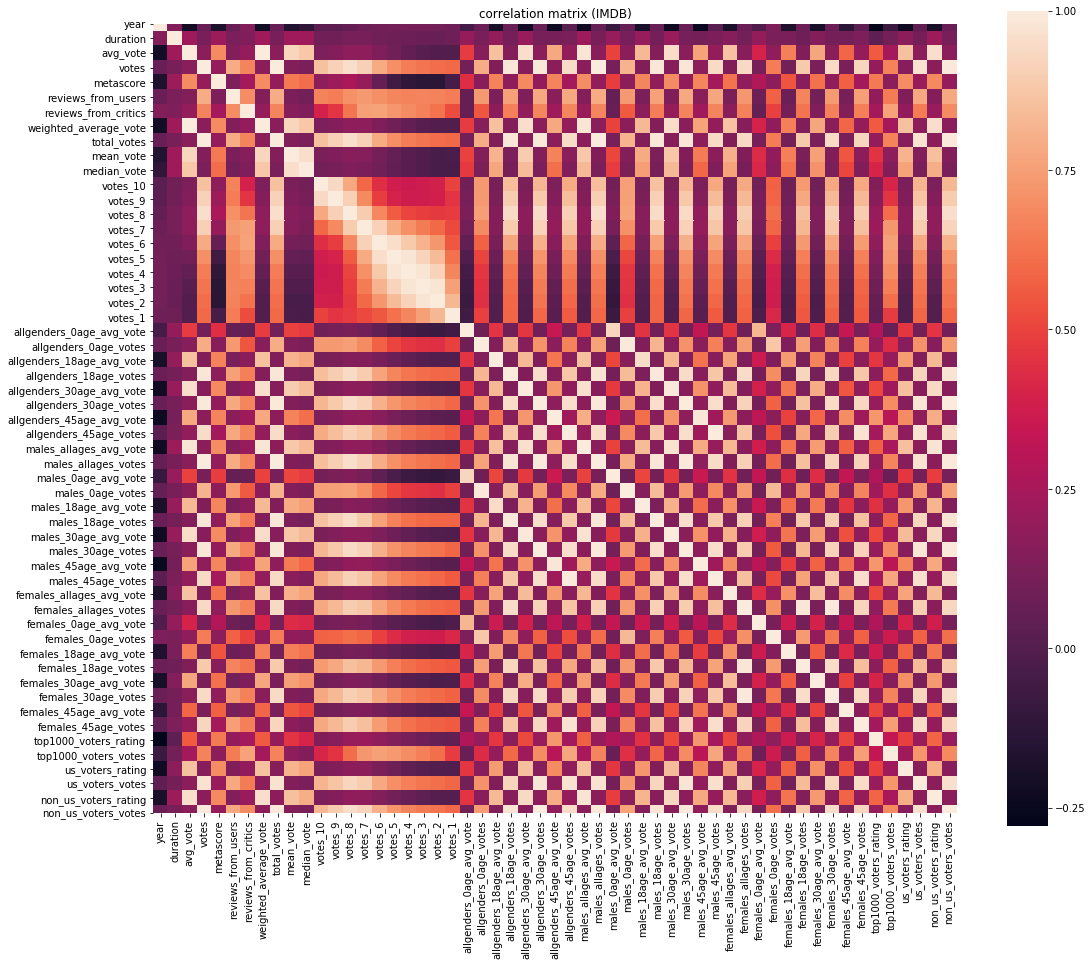

In [26]:
# make the correlation matrices.
corrmat_movie_recs = movie_recs.corr()

#corrmat_student = student_df.corr()

plt.figure(figsize=(18,15))

#plt.subplot(1,2,1) = (amount of rows, amount of columns, order of that graph)
# draw the heatmap using seaborn.
#sns.heatmap(corrmat_movie_recs, square=True, annot=True, linewidths=.9)
sns.heatmap(corrmat_movie_recs, square=True)
plt.title("correlation matrix (IMDB)")

plt.show()

## Model Preparation

In [ ]:
movie_recs = movies.drop(columns=['imdb_title_id', 'title', 'original_title', 'date_published', 'genre', 'description', 'budget', 'usa_gross_income', 'worlwide_gross_income','metascore', 'reviews_from_users', 'reviews_from_critics'])

In [ ]:
#Drop columns with null values
movie_recs = movie_recs.dropna()

In [ ]:
#Time to encode for the model. 
#Transform

from sklearn.preprocessing import OrdinalEncoder

od = OrdinalEncoder()

X = od.fit_transform(movie_recs)

In [ ]:
#Check if Feature variable is numeric data type
X.dtype

## Form Cluster

In [ ]:
from sklearn import cluster
kmeans = cluster.MiniBatchKMeans(n_clusters=1000)

kmeans.fit(X)

In [ ]:
movie_recs['minibatch_kmeans_labels'] = kmeans.labels_

In [ ]:
movie_recs['title'] = movies['title']

In [ ]:
#Pass an 'X', film suggestion is 'Gigi' to get prediction/film rec.

movie_recs[movie_recs['title'].str.contains('GIGI', case=False)]]

In [ ]:
#Here is a cluster of 10 suggestions
movie_recs[movie_recs['minibatch_kmeans_labels'] == 566].head(10)

In [ ]:
#Try another cluster and look at Kaggle

## Summary Discussion:
1-Your end-user and the value your project provides to them.
2-Quantifiable results based on the research you’ve conducted.
3-The visuals you chose and what they represent for your research.
4-Next steps you'd take to expand on your work.
5-A specified research question your model addresses.
6-How you chose your model specification and what alternatives you compared it to.
7-The practical uses of your model for an audience of interest.
8-Any weak points or shortcomings of your model.